Installation of Libraries.


*   RobustLinearReg - Required for Theil-Sen Regressor
*   Scatterplot 3D - Required for 3D scatter plots
*   Corrplot - Required for Correlation matrix

In [1]:
library(lattice)
install.packages('RobustLinearReg')
library(RobustLinearReg)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
install.packages("scatterplot3d")
library("scatterplot3d")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
install.packages("corrplot")
library(corrplot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.92 loaded



Load data from CSV into R kernal.

Four streams of data is available:


*   2020-2021 Grades, Attendance and VLE Use
*   2021-2022 Grades, Attendance and VLE Use
*   2022-2023 Grades, Attendance and VLE Use
*   Microsoft Stream Viewing Metrics

In [4]:
data2021 <- read.csv("https://raw.githubusercontent.com/ChrisAcornleyPhD/CAP512Data/main/GradeReport2020-2021.csv")
data2022 <- read.csv("https://raw.githubusercontent.com/ChrisAcornleyPhD/CAP512Data/main/GradeReport2021-2022.csv")
data2023 <- read.csv("https://raw.githubusercontent.com/ChrisAcornleyPhD/CAP512Data/main/GradeReport2022-2023.csv")
stream_metrics <- read.csv("https://raw.githubusercontent.com/ChrisAcornleyPhD/CAP512Data/main/Stream-Views.csv")

This process is to remove the inidividual register counts from the raw data. This leaves the remaining listed columns in a new table that can be used for the correlation matrix.
Names for correlation matrix are:

* g    -> Grade Score
* pa   -> Attendance Overall (%)
* pae  -> Attendance Expected (%)
* prac -> Practical Attendance (%)
* lec  -> Lecture Attendance (%)
* nac  -> No. Activity Count on VLE

In [5]:
keep_columns <- c("GRADE", "ATTENDANCE.PERCENT", "ATTENDANCE.EXPECTED.PERCENT", "PRACTICAL.PERCENT", "LECTURE.PERCENT", "ACTIVITY.COUNT")
data2022_amended <- data2022[keep_columns]
data2023_amended <- data2023[keep_columns]
names(data2022_amended) <- c("g", "pa", "pae", "prac", "lec", "nac")
names(data2023_amended) <- c("g", "pa", "pae", "prac", "lec", "nac")

Limit streaming metrics to name of recording and total number of views.
Plot count of viewing across all recordings.

                                                      VIDEO VIEWS
1                                       CMP203 Introduction    64
2                       Lecture CMP203 - Introduction to 3D   205
3  Lecture 2 CMP203 - Transforms and Hierarchical Modelling   237
4                         Lecture 3 CMP203: Lighting Part 1   186
5                          Lecture 4 CMP203 Lighting Part 2   162
6                                     CMP203 #05: Texturing   179
7                                   CMP203 Lecture - Camera   193
8                              CMP203 #07: The Depth Buffer   135
9                            CMP203 Lecture - Vertex Arrays   195
10                                CMP203 #09: Model Loading   125
11                          CMP203 Lecture - Stencil Buffer   124
12                                      CMP203 #11: Shadows   105
13                       CMP203 - Revision and Billboarding    63


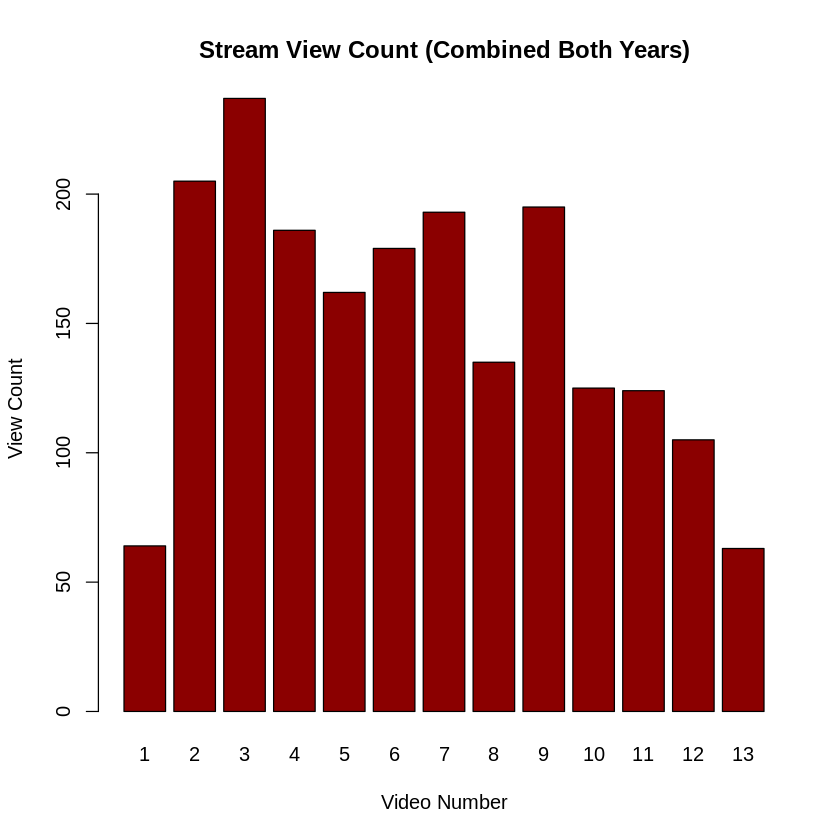

In [6]:
stream_metrics_limited <- stream_metrics[c("VIDEO","VIEWS")]
print(stream_metrics_limited)
barplot(main="Stream View Count (Combined Both Years)", ylab = "View Count", xlab="Video Number",  height=stream_metrics_limited$VIEWS, names=seq(1:13), col="darkred")

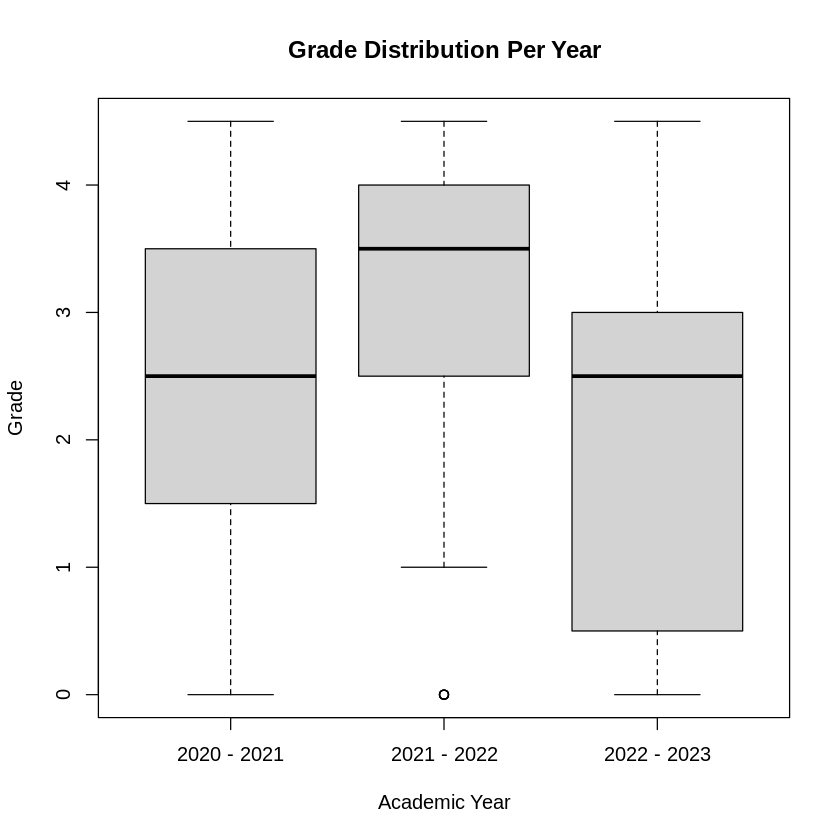

In [7]:
boxplot(data2021$GRADE, data2022$GRADE, data2023$GRADE, main="Grade Distribution Per Year", ylab = "Grade", xlab = "Academic Year", names=c("2020 - 2021", "2021 - 2022", "2022 - 2023"))


 A A+  B B+  C C+  D D+  F MF NS 
 7  4  7  7 10  8  4  6  1  2  4 


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   1.500   2.500   2.425   3.500   4.500 

[1] 60

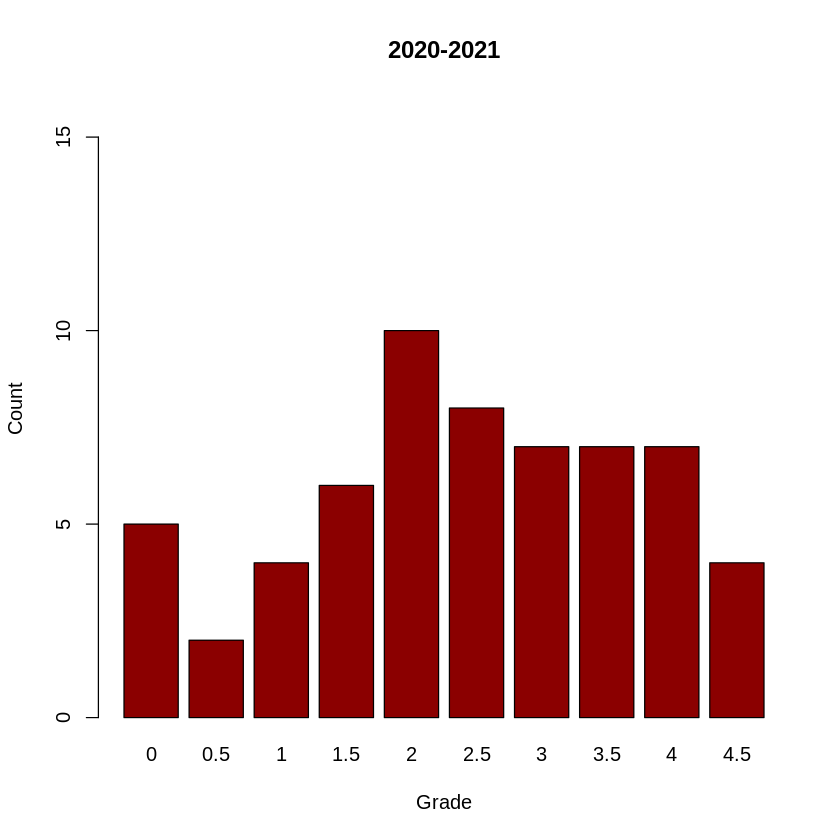

In [8]:
gradeCount2021 <- table(data2021$SYMBOL)
print(gradeCount2021)
gradeCount2021 <- table(data2021$GRADE)
barplot(gradeCount2021, ylim=c(0, 16), main="2020-2021", xlab="Grade", ylab="Count", col="darkred")
summary(data2021$GRADE)
nrow(data2021)


 A A+  B B+  C C+  D D+ NS 
15  8 14 14  6  7  1  1  5 


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   2.500   3.500   3.085   4.000   4.500 

[1] 71

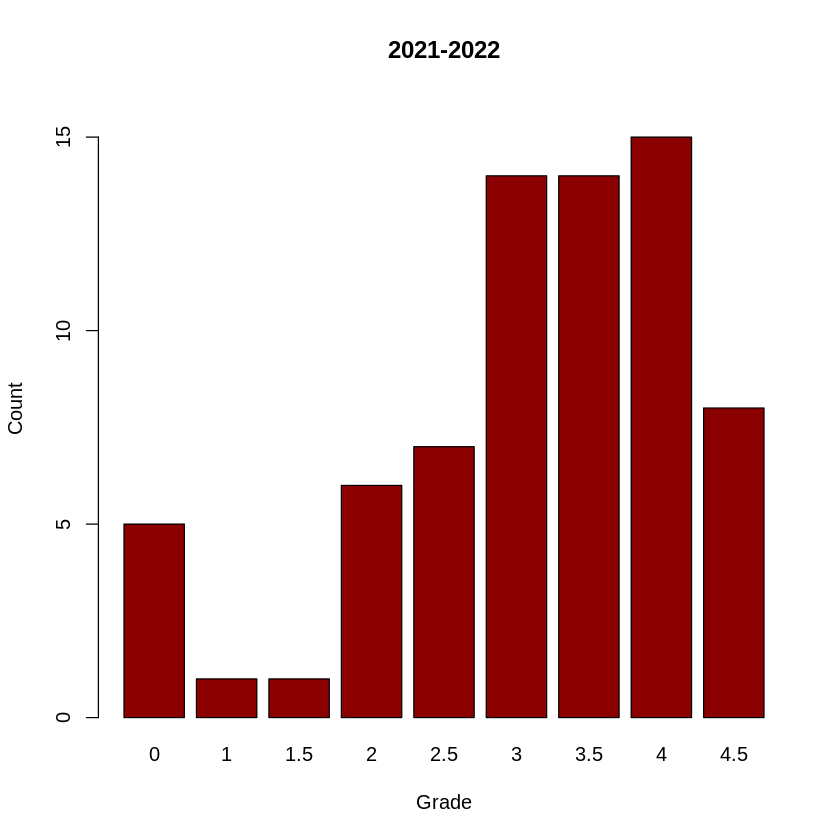

In [9]:
gradeCount2022 <- table(data2022$SYMBOL)
print(gradeCount2022)
gradeCount2022 <- table(data2022$GRADE)
barplot(gradeCount2022, ylim=c(0, 16), main="2021-2022", xlab="Grade", ylab="Count", col="darkred")
summary(data2022$GRADE)
nrow(data2022)


 A A+  B B+  C C+ D+  F MF NS 
 5  3 12  5  9  7  2  1  8 11 


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.500   2.500   2.056   3.000   4.500 

[1] 63

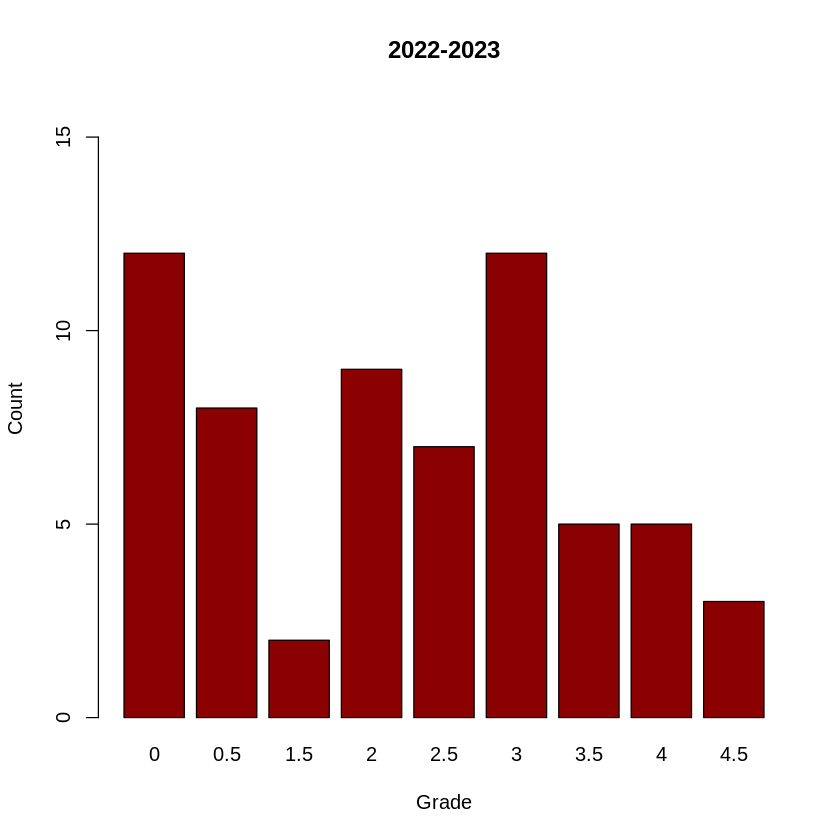

In [10]:
gradeCount2023 <- table(data2023$SYMBOL)
print(gradeCount2023)
gradeCount2023 <- table(data2023$GRADE)
barplot(gradeCount2023, ylim=c(0, 16), main="2022-2023", xlab="Grade", ylab="Count", col="darkred")
summary(data2023$GRADE)
nrow(data2023)

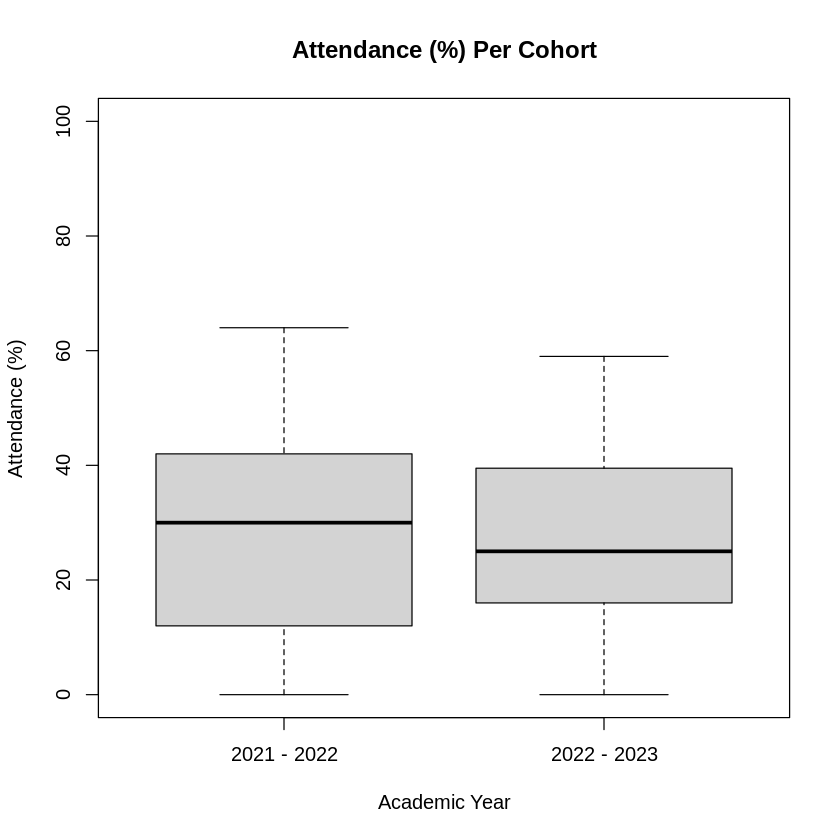

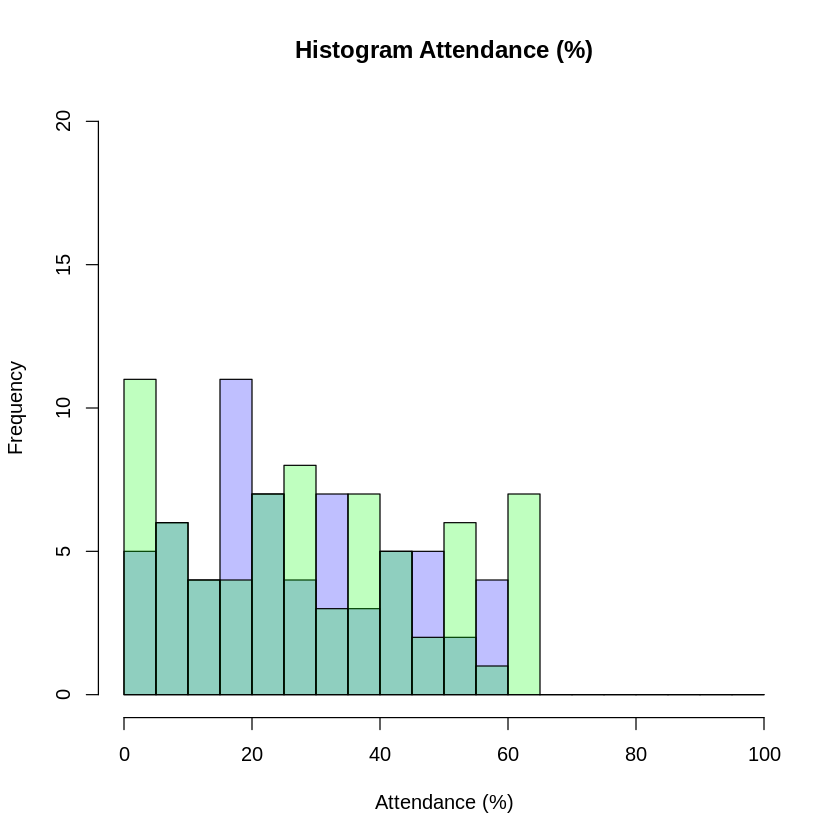

In [11]:
boxplot(data2022$ATTENDANCE.PERCENT, data2023$ATTENDANCE.PERCENT, main="Attendance (%) Per Cohort", ylab = "Attendance (%)", xlab = "Academic Year", names=c("2021 - 2022", "2022 - 2023"), ylim=c(0,100))

hist(data2023$ATTENDANCE.PERCENT, main="Histogram Attendance (%)", xlab="Attendance (%)", col=rgb(0,0,1,1/4), xlim=c(0,100), breaks=c(0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100), ylim=c(0,20))
hist(data2022$ATTENDANCE.PERCENT, xlab="Attendance (%)", add=TRUE, col=rgb(0,1,0,1/4),, xlim=c(0,100), breaks=c(0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100))

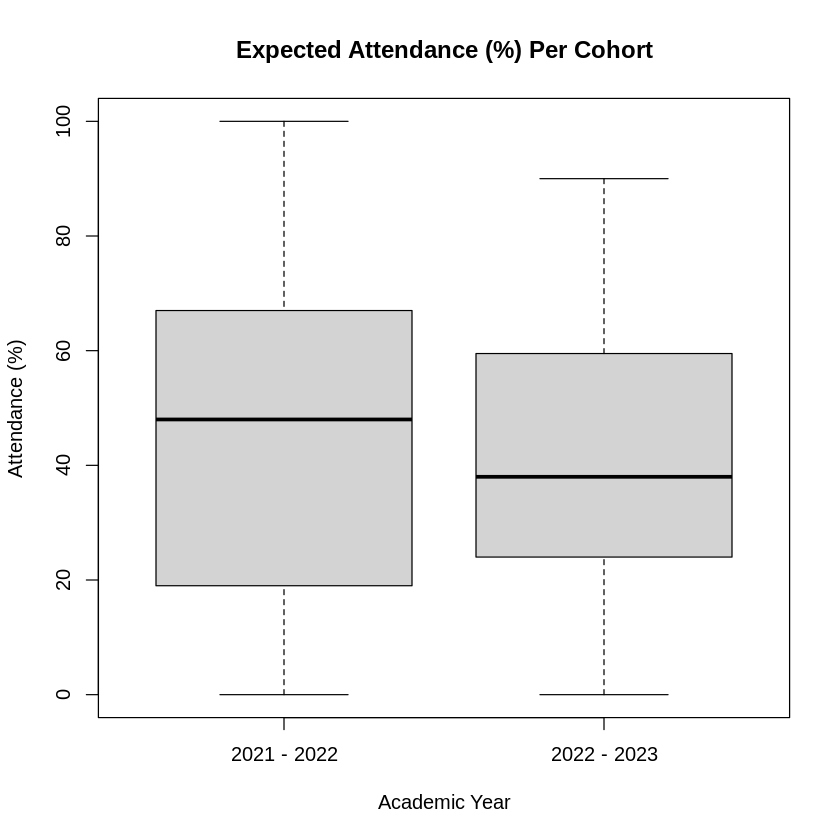

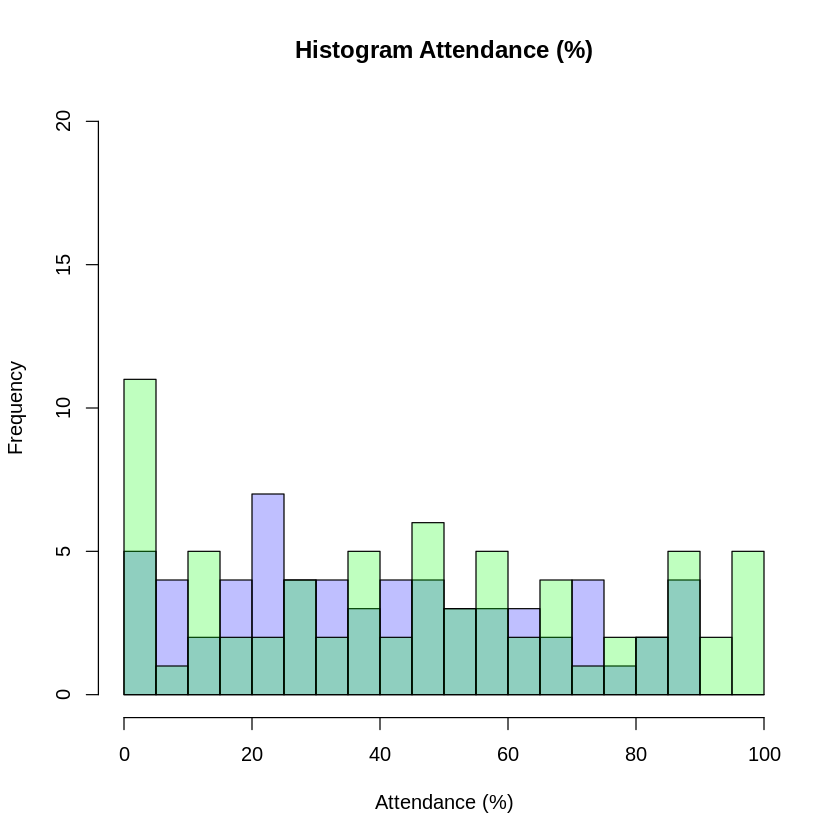

In [12]:
boxplot(data2022$ATTENDANCE.EXPECTED.PERCENT, data2023$ATTENDANCE.EXPECTED.PERCENT, main="Expected Attendance (%) Per Cohort", ylab = "Attendance (%)", xlab = "Academic Year", names=c("2021 - 2022", "2022 - 2023"), ylim=c(0,100))

hist(data2023$ATTENDANCE.EXPECTED.PERCENT, main="Histogram Attendance (%)", xlab="Attendance (%)", col=rgb(0,0,1,1/4), xlim=c(0,100), breaks=c(0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100), ylim=c(0,20))
hist(data2022$ATTENDANCE.EXPECTED.PERCENT, xlab="Attendance (%)", add=TRUE, col=rgb(0,1,0,1/4),, xlim=c(0,100), breaks=c(0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100))

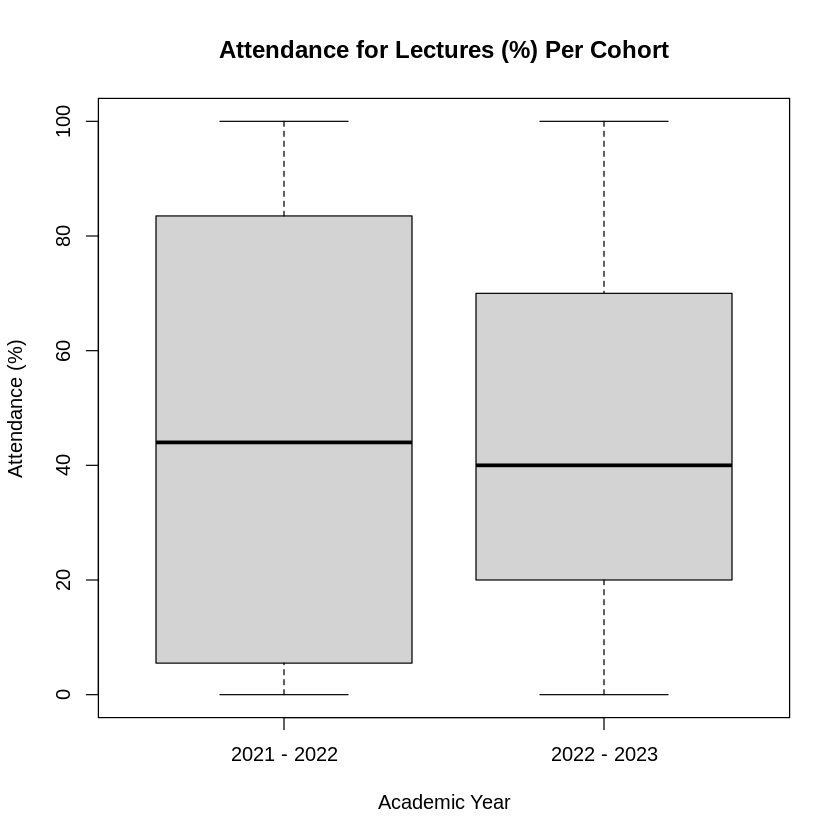

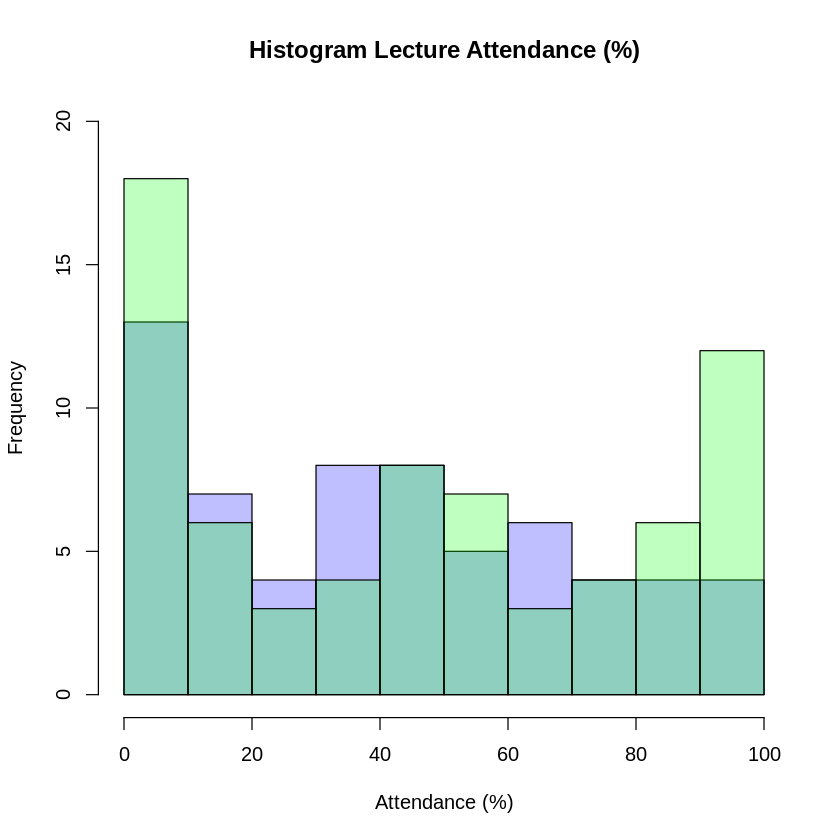

In [13]:
boxplot(data2022$LECTURE.PERCENT, data2023$LECTURE.PERCENT, main="Attendance for Lectures (%) Per Cohort", ylab = "Attendance (%)", xlab = "Academic Year", names=c("2021 - 2022", "2022 - 2023"), ylim=c(0,100))

hist(data2023$LECTURE.PERCENT, main="Histogram Lecture Attendance (%)", xlab="Attendance (%)", col=rgb(0,0,1,1/4), xlim=c(0,100), breaks=c(0,10,20,30,40,50,60,70,80,90,100), ylim=c(0,20))
hist(data2022$LECTURE.PERCENT, xlab="Attendance (%)", add=TRUE, col=rgb(0,1,0,1/4),, xlim=c(0,100), breaks=c(0,10,20,30,40,50,60,70,80,90,100))

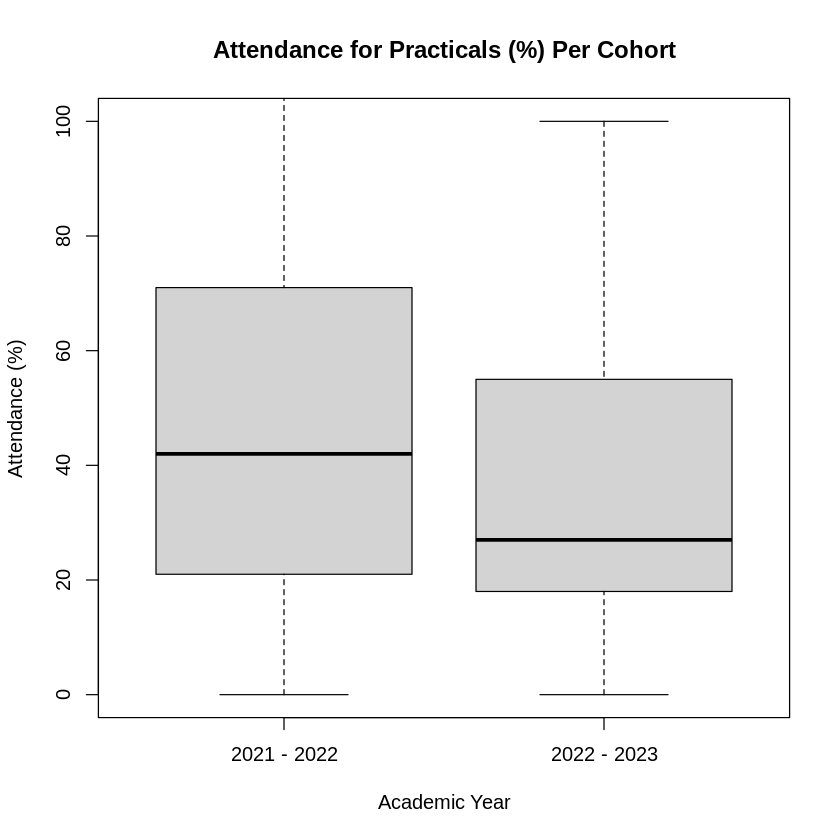

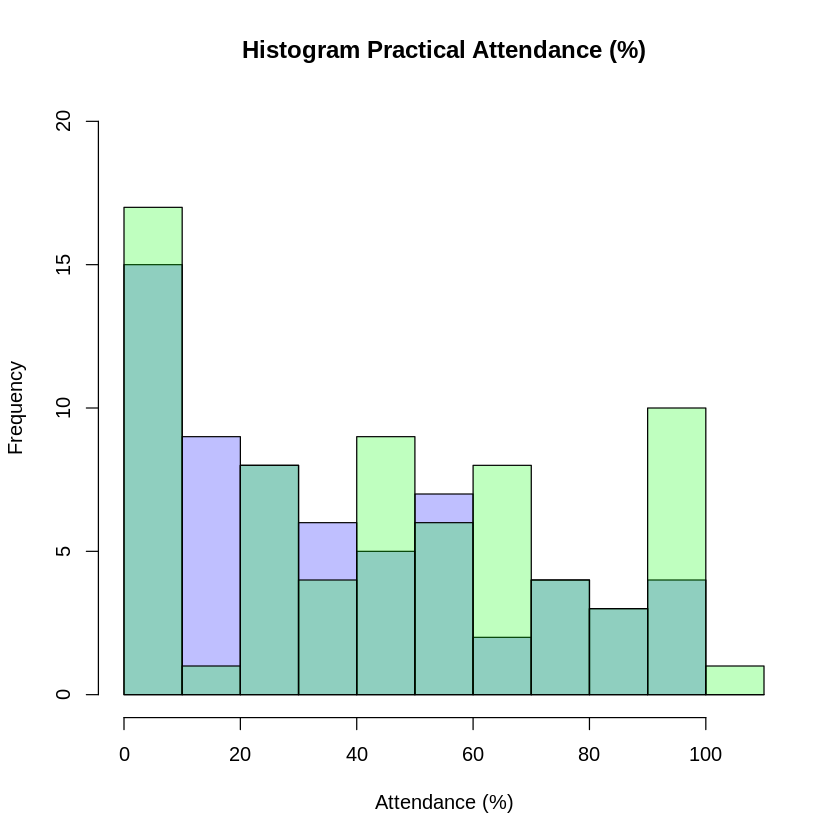

In [14]:
boxplot(data2022$PRACTICAL.PERCENT, data2023$PRACTICAL.PERCENT, main="Attendance for Practicals (%) Per Cohort", ylab = "Attendance (%)", xlab = "Academic Year", names=c("2021 - 2022", "2022 - 2023"), ylim=c(0,100))

hist(data2023$PRACTICAL.PERCENT, main="Histogram Practical Attendance (%)", xlab="Attendance (%)", col=rgb(0,0,1,1/4), xlim=c(0,110), breaks=c(0,10,20,30,40,50,60,70,80,90,100,110), ylim=c(0,20))
hist(data2022$PRACTICAL.PERCENT, xlab="Attendance (%)", add=TRUE, col=rgb(0,1,0,1/4), xlim=c(0,110), breaks=c(0,10,20,30,40,50,60,70,80,90,100,110))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    7.00   15.00   17.11   21.00   74.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.00   25.00   42.00   44.29   50.00  138.00       2 

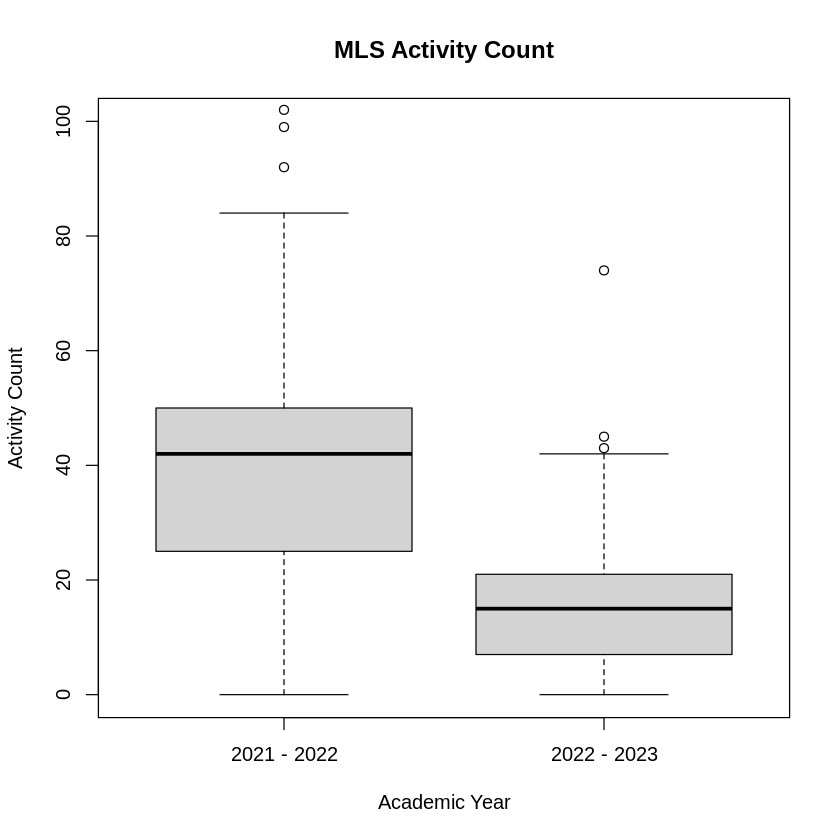

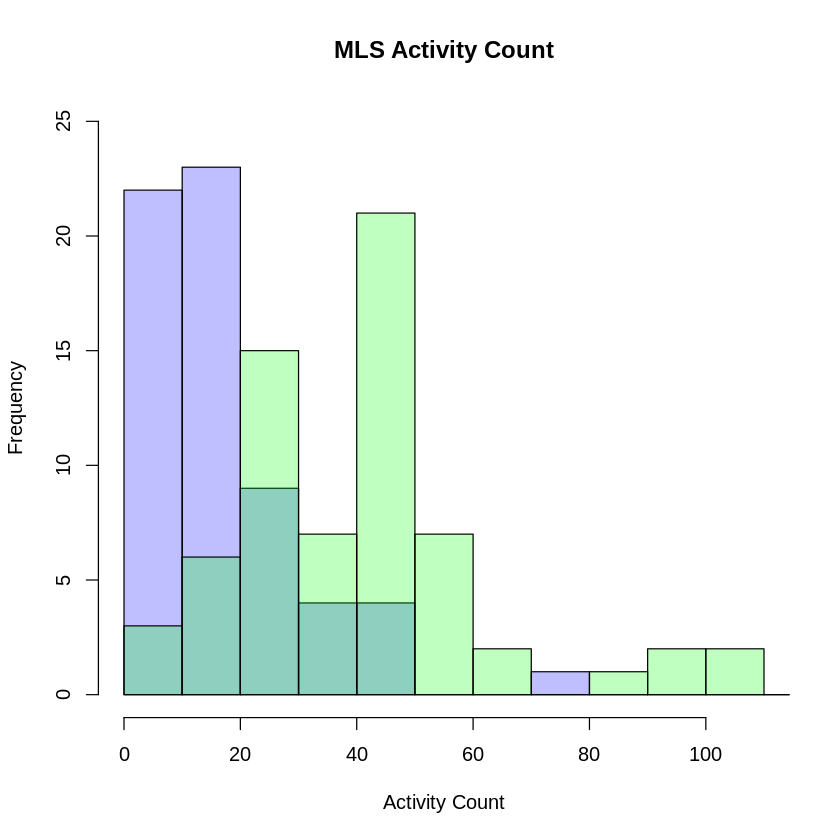

In [15]:
boxplot(data2022$ACTIVITY.COUNT, data2023$ACTIVITY.COUNT, main="MLS Activity Count", ylab = "Activity Count", xlab = "Academic Year", names=c("2021 - 2022", "2022 - 2023"), ylim=c(0,100))

summary(data2023$ACTIVITY.COUNT)
summary(data2022$ACTIVITY.COUNT)

hist(data2023$ACTIVITY.COUNT, main="MLS Activity Count", xlab="Activity Count", col=rgb(0,0,1,1/4), xlim=c(0,110), breaks=c(0,10,20,30,40,50,60,70,80,90,100,110,120,130,140), ylim=c(0,25))
hist(data2022$ACTIVITY.COUNT, xlab="Activity Count", add=TRUE, col=rgb(0,1,0,1/4), xlim=c(0,110), breaks=c(0,10,20,30,40,50,60,70,80,90,100,110,120,130,140))

In [16]:
summary(data2021$GRADE)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   1.500   2.500   2.425   3.500   4.500 

In [17]:
summary(data2022$GRADE)
summary(data2022$ATTENDANCE.PERCENT)
summary(data2022$ATTENDANCE.EXPECTED.PERCENT)
summary(data2022$LECTURE.PERCENT)
summary(data2022$PRACTICAL.PERCENT)
summary(data2022$ACTIVITY.COUNT)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   2.500   3.500   3.085   4.000   4.500 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   12.00   30.00   29.27   42.00   64.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   19.00   48.00   46.18   67.00  100.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    5.50   44.00   45.85   83.50  100.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   21.00   42.00   46.37   71.00  108.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.00   25.00   42.00   44.29   50.00  138.00       2 

In [18]:
summary(data2023$GRADE)
summary(data2023$ATTENDANCE.PERCENT)
summary(data2023$ATTENDANCE.EXPECTED.PERCENT)
summary(data2023$LECTURE.PERCENT)
summary(data2023$PRACTICAL.PERCENT)
summary(data2023$ACTIVITY.COUNT)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.500   2.500   2.056   3.000   4.500 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   16.00   25.00   26.63   39.50   59.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   24.00   38.00   40.63   59.50   90.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   20.00   40.00   44.92   70.00  100.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0    18.0    27.0    36.6    55.0   100.0 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    7.00   15.00   17.11   21.00   74.00 

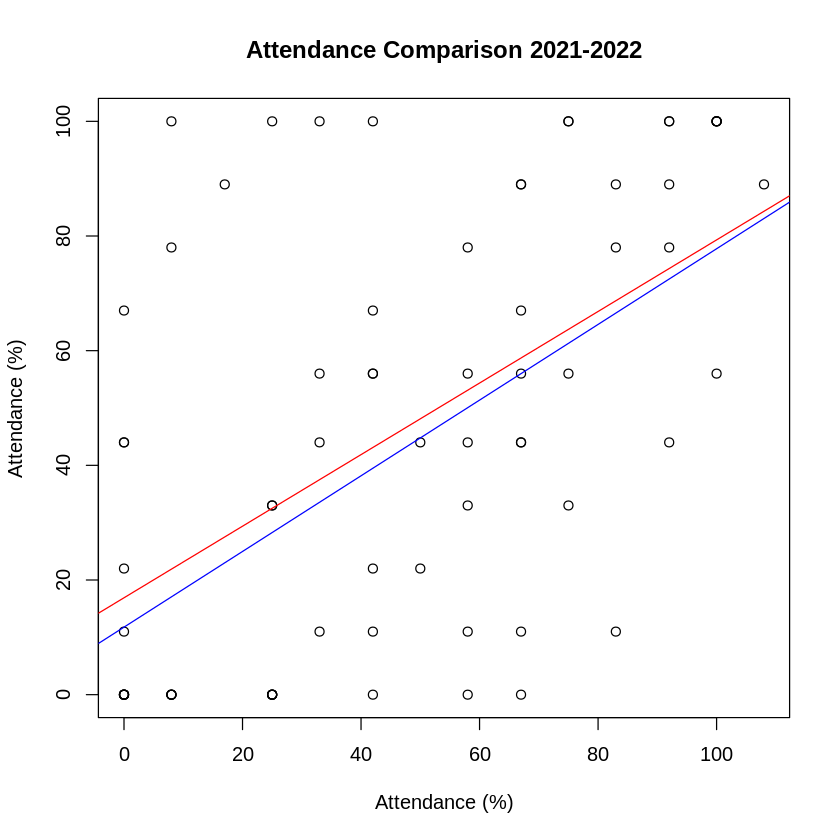

In [19]:
fit <- lm(data2022$LECTURE.PERCENT ~ data2022$PRACTICAL.PERCENT)
theil_fit <- theil_sen_regression(LECTURE.PERCENT ~ PRACTICAL.PERCENT, data2022)
plot(data2022$PRACTICAL.PERCENT, data2022$LECTURE.PERCENT, main="Attendance Comparison 2021-2022", ylim=c(0,100), ylab="Attendance (%)", xlab= "Attendance (%)")
abline(fit, col="red")
abline(theil_fit, col="blue")

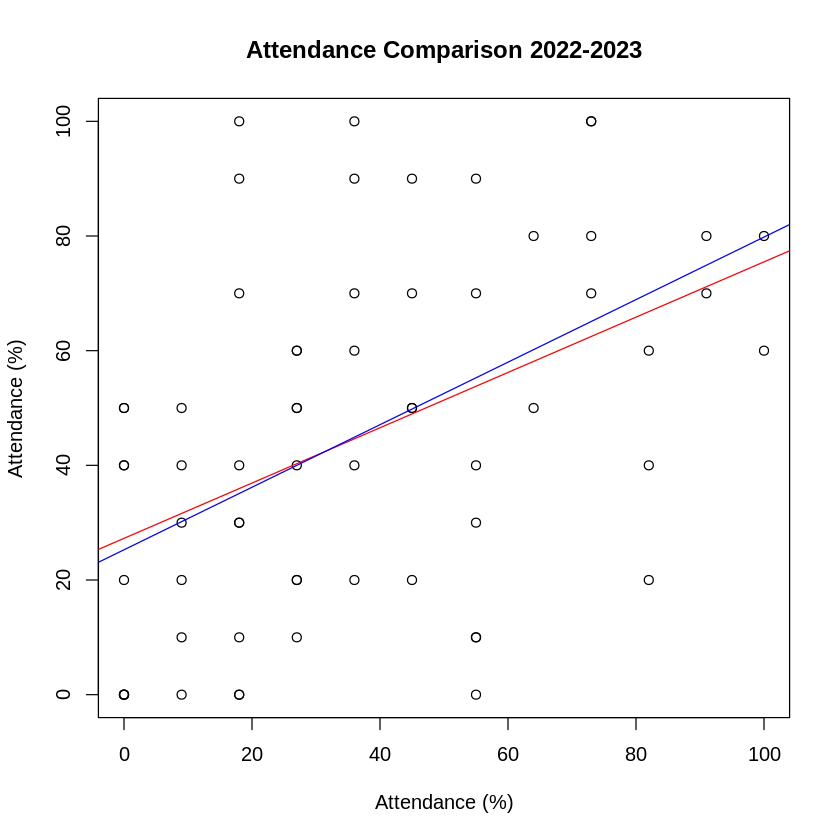

In [20]:
fit <- lm(data2023$LECTURE.PERCENT ~ data2023$PRACTICAL.PERCENT)
theil_fit <- theil_sen_regression(LECTURE.PERCENT ~ PRACTICAL.PERCENT, data2023)
plot(data2023$PRACTICAL.PERCENT, data2023$LECTURE.PERCENT, main="Attendance Comparison 2022-2023", ylim=c(0,100), ylab="Attendance (%)", xlab= "Attendance (%)")
abline(fit, col="red")
abline(theil_fit, col="blue")

In [21]:
data2022$GRADE2 <- data2022$GRADE ^ 2
data2023$GRADE2 <- data2023$GRADE ^ 2
gradeValues <- seq(0, 4.5, 0.5)

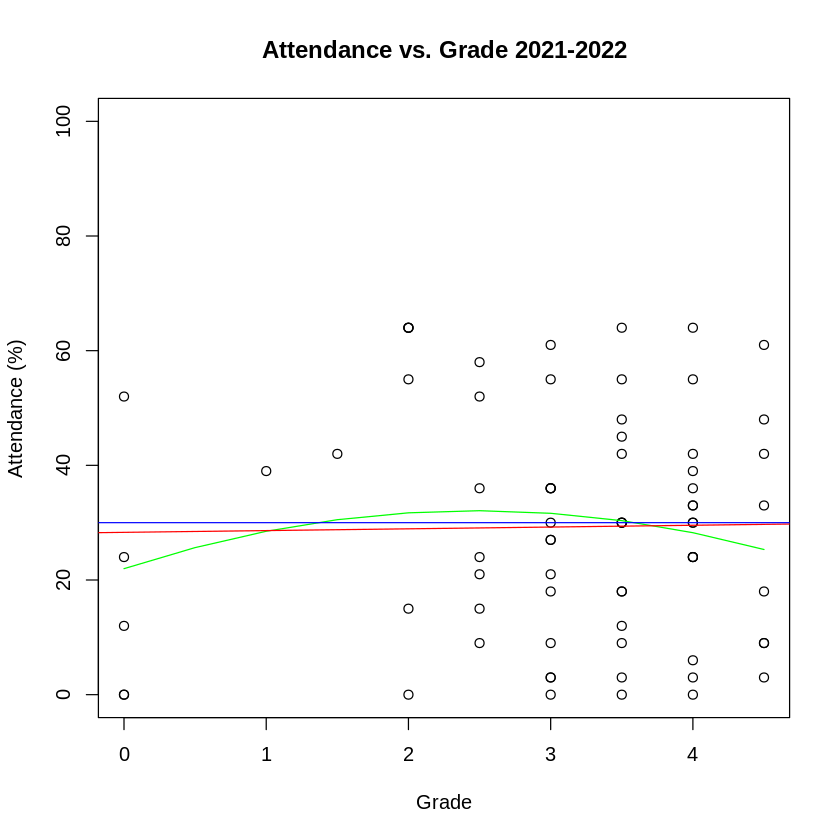

In [22]:
fit <- lm(data2022$ATTENDANCE.PERCENT ~ data2022$GRADE)
theil_fit <- theil_sen_regression(ATTENDANCE.PERCENT ~ GRADE, data2022)
quad_model <- lm(ATTENDANCE.PERCENT ~ GRADE + GRADE2, data = data2022)
prediction <- predict(quad_model, list(GRADE = gradeValues, GRADE2 = gradeValues^2))
plot(data2022$GRADE, data2022$ATTENDANCE.PERCENT, main="Attendance vs. Grade 2021-2022", ylim=c(0,100), ylab="Attendance (%)", xlab= "Grade")
lines(gradeValues, prediction, col="green")
abline(fit, col="red")
abline(theil_fit, col="blue")

In [23]:
cor(data2022$GRADE,data2022$ATTENDANCE.PERCENT)
cov(data2022$GRADE,data2022$ATTENDANCE.PERCENT)
summary(fit)
summary(theil_fit)
summary(quad_model)

[1] 0.01815565

[1] 0.4199195


Call:
lm(formula = data2022$ATTENDANCE.PERCENT ~ data2022$GRADE)

Residuals:
    Min      1Q  Median      3Q     Max 
-29.551 -16.855   0.449  12.913  35.068 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     28.3131     6.7581   4.190 8.13e-05 ***
data2022$GRADE   0.3094     2.0515   0.151    0.881    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 19.99 on 69 degrees of freedom
Multiple R-squared:  0.0003296,	Adjusted R-squared:  -0.01416 
F-statistic: 0.02275 on 1 and 69 DF,  p-value: 0.8805



Call:
theil_sen_regression(formula = ATTENDANCE.PERCENT ~ GRADE, data = data2022)

Residuals:
   Min     1Q Median     3Q    Max 
   -30    -18      0     12     34 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   30.000      6.764   4.435 3.39e-05 ***
GRADE          0.000      2.053   0.000        1    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 20.01 on 69 degrees of freedom
Multiple R-squared:      0,	Adjusted R-squared:  -0.01449 
F-statistic:     0 on 1 and 69 DF,  p-value: 1



Call:
lm(formula = ATTENDANCE.PERCENT ~ GRADE + GRADE2, data = data2022)

Residuals:
    Min      1Q  Median      3Q     Max 
-31.717 -16.519  -0.355  14.197  35.750 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)   21.980      8.518   2.580    0.012 *
GRADE          8.169      6.788   1.203    0.233  
GRADE2        -1.650      1.359  -1.214    0.229  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 19.93 on 68 degrees of freedom
Multiple R-squared:  0.02154,	Adjusted R-squared:  -0.007236 
F-statistic: 0.7486 on 2 and 68 DF,  p-value: 0.4769


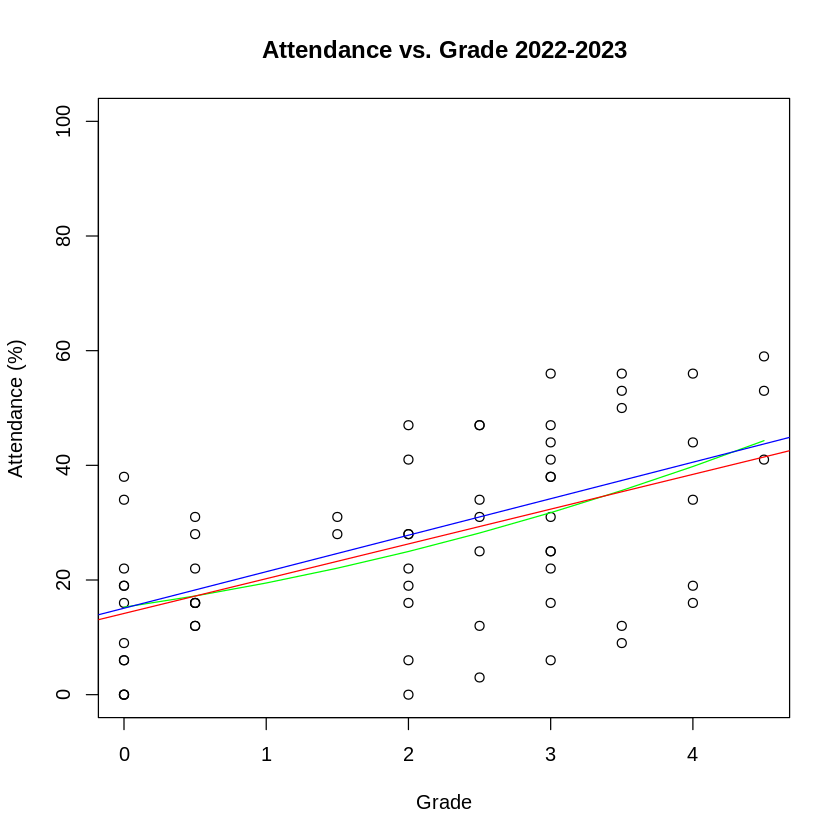

In [24]:
fit <- lm(data2023$ATTENDANCE.PERCENT ~ data2023$GRADE)
theil_fit <- theil_sen_regression(ATTENDANCE.PERCENT ~ GRADE, data2023)
quad_model <- lm(ATTENDANCE.PERCENT ~ GRADE + GRADE2, data = data2023)
predictions <- predict(quad_model, list(GRADE = gradeValues, GRADE2 = gradeValues^2))
plot(data2023$GRADE, data2023$ATTENDANCE.PERCENT, main="Attendance vs. Grade 2022-2023", ylim=c(0,100), ylab="Attendance (%)", xlab= "Grade")
lines(gradeValues, predictions, col="green")
abline(fit, col="red")
abline(theil_fit, col="blue")

In [25]:
cor(data2023$GRADE,data2023$ATTENDANCE.PERCENT)
cov(data2023$GRADE,data2023$ATTENDANCE.PERCENT)
summary(fit)
summary(theil_fit)
summary(quad_model)

[1] 0.5339008

[1] 12.72222


Call:
lm(formula = data2023$ATTENDANCE.PERCENT ~ data2023$GRADE)

Residuals:
    Min      1Q  Median      3Q     Max 
-26.395  -8.168   1.670  11.170  23.832 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)      14.168      3.084   4.594 2.23e-05 ***
data2023$GRADE    6.065      1.230   4.932 6.60e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14.02 on 61 degrees of freedom
Multiple R-squared:  0.2851,	Adjusted R-squared:  0.2733 
F-statistic: 24.32 on 1 and 61 DF,  p-value: 6.6e-06



Call:
theil_sen_regression(formula = ATTENDANCE.PERCENT ~ GRADE, data = data2023)

Residuals:
    Min      1Q  Median      3Q     Max 
-28.367  -9.183   0.000   9.500  22.917 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   15.083      3.105   4.858 8.63e-06 ***
GRADE          6.367      1.238   5.143 3.03e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14.12 on 61 degrees of freedom
Multiple R-squared:  0.3024,	Adjusted R-squared:  0.291 
F-statistic: 26.45 on 1 and 61 DF,  p-value: 3.032e-06



Call:
lm(formula = ATTENDANCE.PERCENT ~ GRADE + GRADE2, data = data2023)

Residuals:
    Min      1Q  Median      3Q     Max 
-26.611  -9.118   0.736  10.022  24.255 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  15.2640     3.5454   4.305 6.26e-05 ***
GRADE         3.5748     4.1022   0.871    0.387    
GRADE2        0.6396     1.0047   0.637    0.527    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14.09 on 60 degrees of freedom
Multiple R-squared:  0.2898,	Adjusted R-squared:  0.2662 
F-statistic: 12.24 on 2 and 60 DF,  p-value: 3.472e-05


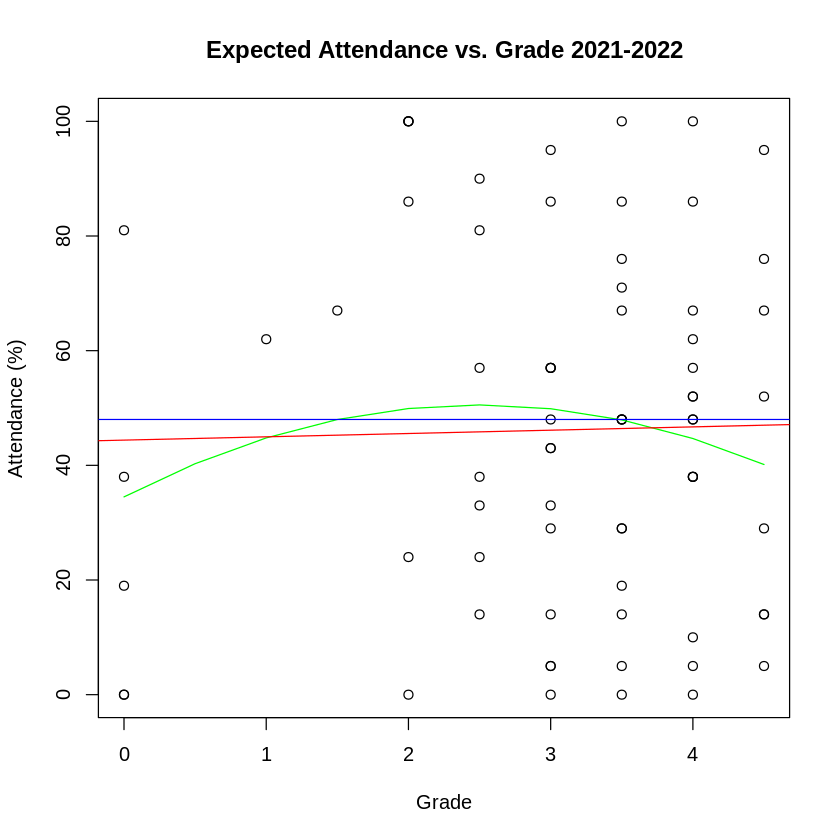

In [26]:
fit <- lm(data2022$ATTENDANCE.EXPECTED.PERCENT ~ data2022$GRADE)
theil_fit <- theil_sen_regression(ATTENDANCE.EXPECTED.PERCENT ~ GRADE, data2022)
quad_model <- lm(ATTENDANCE.EXPECTED.PERCENT ~ GRADE + GRADE2, data = data2022)
prediction <- predict(quad_model, list(GRADE = gradeValues, GRADE2 = gradeValues^2))
plot(data2022$GRADE, data2022$ATTENDANCE.EXPECTED.PERCENT, main="Expected Attendance vs. Grade 2021-2022", ylim=c(0,100), ylab="Attendance (%)", xlab= "Grade")
lines(gradeValues, prediction, col="green")
abline(fit, col="red")
abline(theil_fit, col="blue")

In [27]:
cor(data2022$GRADE,data2022$ATTENDANCE.EXPECTED.PERCENT)
cov(data2022$GRADE,data2022$ATTENDANCE.EXPECTED.PERCENT)
summary(fit)
summary(theil_fit)
summary(quad_model)

[1] 0.02170085

[1] 0.7843058


Call:
lm(formula = data2022$ATTENDANCE.EXPECTED.PERCENT ~ data2022$GRADE)

Residuals:
    Min      1Q  Median      3Q     Max 
-46.712 -26.412   1.288  21.155  54.444 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)      44.400     10.560   4.205 7.71e-05 ***
data2022$GRADE    0.578      3.205   0.180    0.857    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 31.24 on 69 degrees of freedom
Multiple R-squared:  0.0004709,	Adjusted R-squared:  -0.01402 
F-statistic: 0.03251 on 1 and 69 DF,  p-value: 0.8574



Call:
theil_sen_regression(formula = ATTENDANCE.EXPECTED.PERCENT ~ 
    GRADE, data = data2022)

Residuals:
   Min     1Q Median     3Q    Max 
   -48    -29      0     19     52 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   48.000     10.580   4.537 2.35e-05 ***
GRADE          0.000      3.212   0.000        1    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 31.3 on 69 degrees of freedom
Multiple R-squared:      0,	Adjusted R-squared:  -0.01449 
F-statistic:     0 on 1 and 69 DF,  p-value: 1



Call:
lm(formula = ATTENDANCE.EXPECTED.PERCENT ~ GRADE + GRADE2, data = data2022)

Residuals:
    Min      1Q  Median      3Q     Max 
-49.910 -26.146   0.078  22.700  55.321 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)   34.499     13.310   2.592   0.0117 *
GRADE         12.866     10.607   1.213   0.2293  
GRADE2        -2.580      2.124  -1.215   0.2286  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 31.13 on 68 degrees of freedom
Multiple R-squared:  0.02171,	Adjusted R-squared:  -0.007066 
F-statistic: 0.7544 on 2 and 68 DF,  p-value: 0.4742


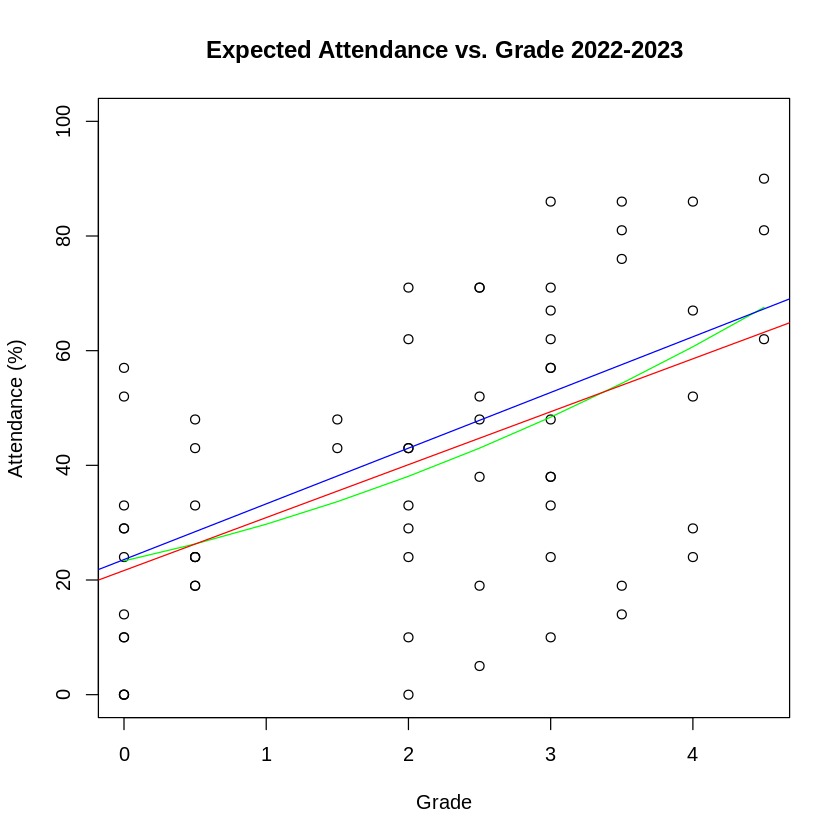

In [28]:
fit <- lm(data2023$ATTENDANCE.EXPECTED.PERCENT ~ data2023$GRADE)
theil_fit <- theil_sen_regression(ATTENDANCE.EXPECTED.PERCENT ~ GRADE, data2023)
quad_model <- lm(ATTENDANCE.EXPECTED.PERCENT ~ GRADE + GRADE2, data = data2023)
predictions <- predict(quad_model, list(GRADE = gradeValues, GRADE2 = gradeValues^2))
plot(data2023$GRADE, data2023$ATTENDANCE.EXPECTED.PERCENT, main="Expected Attendance vs. Grade 2022-2023", ylim=c(0,100), ylab="Attendance (%)", xlab= "Grade")
lines(gradeValues, predictions, col="green")
abline(fit, col="red")
abline(theil_fit, col="blue")

In [29]:
cor(data2023$GRADE,data2023$ATTENDANCE.EXPECTED.PERCENT)
cov(data2023$GRADE,data2023$ATTENDANCE.EXPECTED.PERCENT)
summary(fit)
summary(theil_fit)
summary(quad_model)

[1] 0.5355747

[1] 19.36738


Call:
lm(formula = data2023$ATTENDANCE.EXPECTED.PERCENT ~ data2023$GRADE)

Residuals:
    Min      1Q  Median      3Q     Max 
-40.122 -11.656   2.344  17.186  36.645 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)      21.656      4.675   4.633 1.94e-05 ***
data2023$GRADE    9.233      1.864   4.953 6.10e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 21.26 on 61 degrees of freedom
Multiple R-squared:  0.2868,	Adjusted R-squared:  0.2751 
F-statistic: 24.53 on 1 and 61 DF,  p-value: 6.097e-06



Call:
theil_sen_regression(formula = ATTENDANCE.EXPECTED.PERCENT ~ 
    GRADE, data = data2023)

Residuals:
   Min     1Q Median     3Q    Max 
-43.57 -14.71   0.00  14.00  33.43 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   23.571      4.722   4.992 5.30e-06 ***
GRADE          9.714      1.883   5.159 2.85e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 21.47 on 61 degrees of freedom
Multiple R-squared:  0.3038,	Adjusted R-squared:  0.2924 
F-statistic: 26.62 on 1 and 61 DF,  p-value: 2.851e-06



Call:
lm(formula = ATTENDANCE.EXPECTED.PERCENT ~ GRADE + GRADE2, data = data2023)

Residuals:
    Min      1Q  Median      3Q     Max 
-40.301 -13.335   0.665  15.522  37.592 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  23.3348     5.3732   4.343  5.5e-05 ***
GRADE         5.4189     6.2171   0.872    0.387    
GRADE2        0.9796     1.5226   0.643    0.522    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 21.36 on 60 degrees of freedom
Multiple R-squared:  0.2917,	Adjusted R-squared:  0.2681 
F-statistic: 12.36 on 2 and 60 DF,  p-value: 3.207e-05


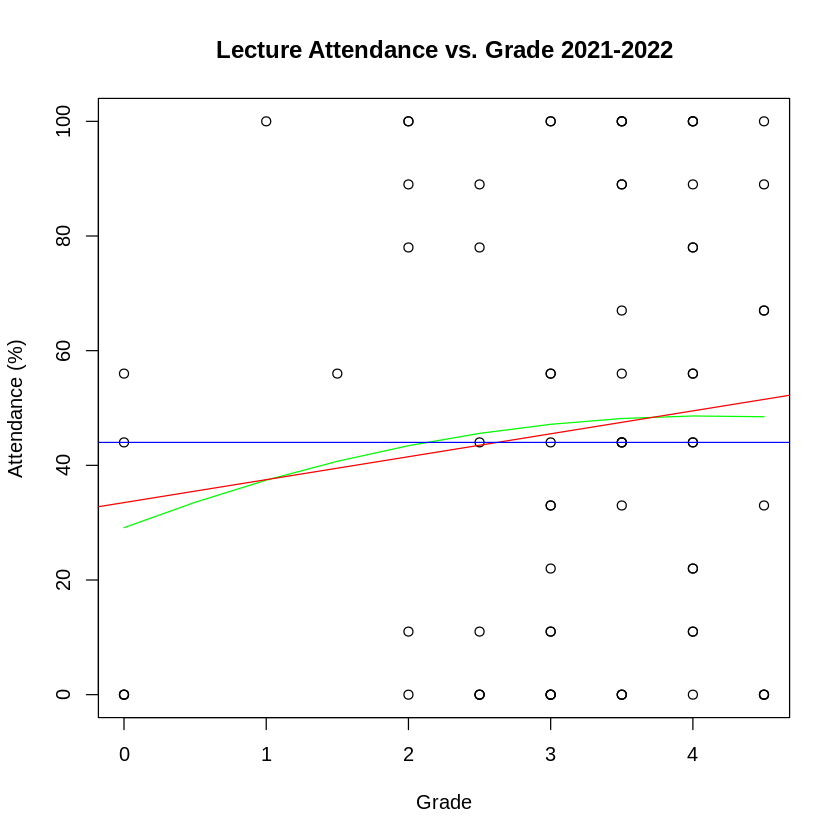

In [30]:
fit <- lm(data2022$LECTURE.PERCENT ~ data2022$GRADE)
theil_fit <- theil_sen_regression(LECTURE.PERCENT ~ GRADE, data2022)
quad_model <- lm(LECTURE.PERCENT ~ GRADE + GRADE2, data = data2022)
predictions <- predict(quad_model, list(GRADE = gradeValues, GRADE2 = gradeValues^2))
plot(data2022$GRADE, data2022$LECTURE.PERCENT, main="Lecture Attendance vs. Grade 2021-2022", ylim=c(0,100), ylab="Attendance (%)", xlab= "Grade")
lines(gradeValues, predictions, col="green")
abline(fit, col="red")
abline(theil_fit, col="blue")

In [31]:
cor(data2022$GRADE,data2022$LECTURE.PERCENT)
cov(data2022$GRADE,data2022$LECTURE.PERCENT)
summary(fit)
summary(theil_fit)
summary(quad_model)

[1] 0.1232224

[1] 5.427565


Call:
lm(formula = data2022$LECTURE.PERCENT ~ data2022$GRADE)

Residuals:
    Min      1Q  Median      3Q     Max 
-51.506 -34.507  -3.507  36.993  62.492 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)  
(Intercept)      33.508     12.774   2.623   0.0107 *
data2022$GRADE    4.000      3.878   1.031   0.3059  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 37.79 on 69 degrees of freedom
Multiple R-squared:  0.01518,	Adjusted R-squared:  0.0009111 
F-statistic: 1.064 on 1 and 69 DF,  p-value: 0.3059



Call:
theil_sen_regression(formula = LECTURE.PERCENT ~ GRADE, data = data2022)

Residuals:
   Min     1Q Median     3Q    Max 
 -44.0  -38.5    0.0   39.5   56.0 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)   44.000     12.888   3.414  0.00108 **
GRADE          0.000      3.912   0.000  1.00000   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 38.13 on 69 degrees of freedom
Multiple R-squared:      0,	Adjusted R-squared:  -0.01449 
F-statistic:     0 on 1 and 69 DF,  p-value: 1



Call:
lm(formula = LECTURE.PERCENT ~ GRADE + GRADE2, data = data2022)

Residuals:
    Min      1Q  Median      3Q     Max 
-48.608 -36.160  -4.169  37.480  62.578 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)   29.134     16.252   1.793   0.0775 .
GRADE          9.428     12.951   0.728   0.4691  
GRADE2        -1.140      2.593  -0.440   0.6616  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 38.02 on 68 degrees of freedom
Multiple R-squared:  0.01797,	Adjusted R-squared:  -0.01091 
F-statistic: 0.6223 on 2 and 68 DF,  p-value: 0.5397


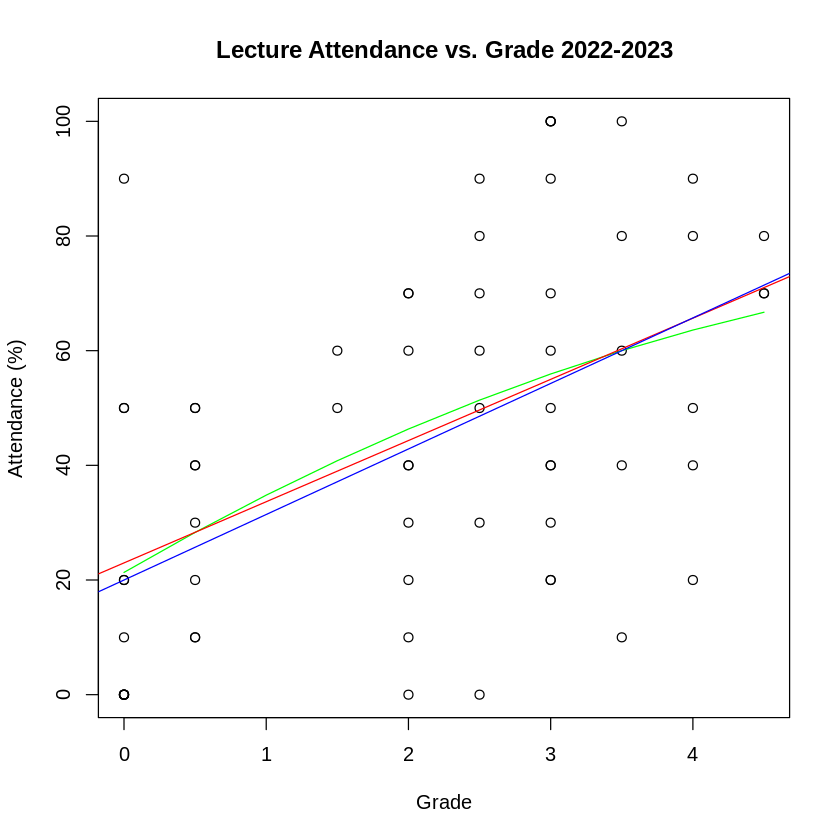

In [32]:
fit <- lm(data2023$LECTURE.PERCENT ~ data2023$GRADE)
theil_fit <- theil_sen_regression(LECTURE.PERCENT ~ GRADE, data2023)
quad_model <- lm(LECTURE.PERCENT ~ GRADE + GRADE2, data = data2023)
predictions <- predict(quad_model, list(GRADE = gradeValues, GRADE2 = gradeValues^2))
plot(data2023$GRADE, data2023$LECTURE.PERCENT, main="Lecture Attendance vs. Grade 2022-2023", ylim=c(0,100), ylab="Attendance (%)", xlab= "Grade")
lines(gradeValues, predictions, col="green")
abline(fit, col="red")
abline(theil_fit, col="blue")

In [33]:
cor(data2023$GRADE,data2023$LECTURE.PERCENT)
cov(data2023$GRADE,data2023$LECTURE.PERCENT)
summary(fit)
summary(theil_fit)
summary(quad_model)

[1] 0.5054016

[1] 22.38351


Call:
lm(formula = data2023$LECTURE.PERCENT ~ data2023$GRADE)

Residuals:
    Min      1Q  Median      3Q     Max 
-50.334 -21.660  -1.004  20.672  67.013 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)      22.987      5.850   3.929  0.00022 ***
data2023$GRADE   10.671      2.333   4.575 2.39e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 26.6 on 61 degrees of freedom
Multiple R-squared:  0.2554,	Adjusted R-squared:  0.2432 
F-statistic: 20.93 on 1 and 61 DF,  p-value: 2.392e-05



Call:
theil_sen_regression(formula = LECTURE.PERCENT ~ GRADE, data = data2023)

Residuals:
   Min     1Q Median     3Q    Max 
-50.00 -20.00   0.00  22.14  70.00 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   20.000      5.864   3.411  0.00115 ** 
GRADE         11.429      2.338   4.888 7.74e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 26.66 on 61 degrees of freedom
Multiple R-squared:  0.2814,	Adjusted R-squared:  0.2697 
F-statistic: 23.89 on 1 and 61 DF,  p-value: 7.74e-06



Call:
lm(formula = LECTURE.PERCENT ~ GRADE + GRADE2, data = data2023)

Residuals:
    Min      1Q  Median      3Q     Max 
-51.377 -21.328  -1.328  19.591  68.672 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)   21.328      6.733   3.168  0.00242 **
GRADE         14.440      7.790   1.854  0.06872 . 
GRADE2        -0.968      1.908  -0.507  0.61375   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 26.76 on 60 degrees of freedom
Multiple R-squared:  0.2586,	Adjusted R-squared:  0.2339 
F-statistic: 10.46 on 2 and 60 DF,  p-value: 0.0001263


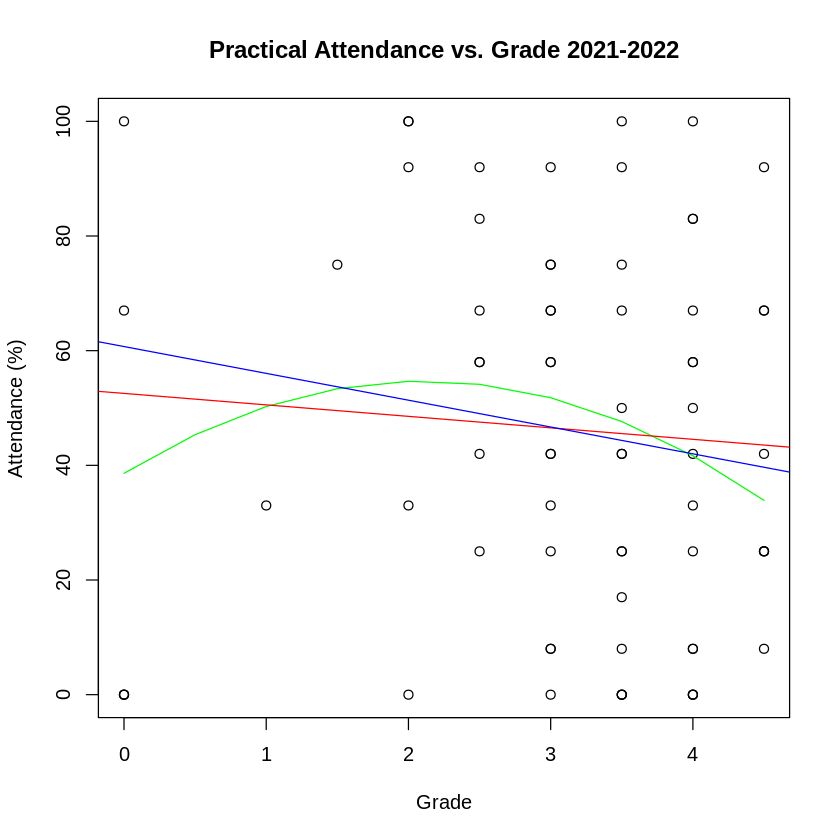

In [34]:
fit <- lm(data2022$PRACTICAL.PERCENT ~ data2022$GRADE)
theil_fit <- theil_sen_regression(PRACTICAL.PERCENT ~ GRADE, data2022)
quad_model <- lm(PRACTICAL.PERCENT ~ GRADE + GRADE2, data = data2022)
predictions <- predict(quad_model, list(GRADE = gradeValues, GRADE2 = gradeValues^2))
plot(data2022$GRADE, data2022$PRACTICAL.PERCENT, main="Practical Attendance vs. Grade 2021-2022", ylim=c(0,100), ylab="Attendance (%)", xlab= "Grade")
lines(gradeValues, predictions, col="green")
abline(fit, col="red")
abline(theil_fit, col="blue")

In [35]:
cor(data2022$GRADE,data2022$PRACTICAL.PERCENT)
cov(data2022$GRADE,data2022$PRACTICAL.PERCENT)
summary(fit)
summary(theil_fit)
summary(quad_model)

[1] -0.06987933

[1] -2.717103


Call:
lm(formula = data2022$PRACTICAL.PERCENT ~ data2022$GRADE)

Residuals:
    Min      1Q  Median      3Q     Max 
-52.542 -25.535  -2.533  24.465  59.462 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)      52.542     11.335   4.635 1.64e-05 ***
data2022$GRADE   -2.002      3.441  -0.582    0.563    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 33.54 on 69 degrees of freedom
Multiple R-squared:  0.004883,	Adjusted R-squared:  -0.009539 
F-statistic: 0.3386 on 1 and 69 DF,  p-value: 0.5625



Call:
theil_sen_regression(formula = PRACTICAL.PERCENT ~ GRADE, data = data2022)

Residuals:
   Min     1Q Median     3Q    Max 
-60.71 -25.68   0.00  27.34  58.00 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   60.714     11.385   5.333 1.16e-06 ***
GRADE         -4.679      3.456  -1.354     0.18    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 33.68 on 69 degrees of freedom
Multiple R-squared:  0.02587,	Adjusted R-squared:  0.01176 
F-statistic: 1.833 on 1 and 69 DF,  p-value: 0.1802



Call:
lm(formula = PRACTICAL.PERCENT ~ GRADE + GRADE2, data = data2022)

Residuals:
    Min      1Q  Median      3Q     Max 
-54.661 -27.966   0.326  26.342  61.383 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)   38.617     14.176   2.724  0.00819 **
GRADE         15.280     11.297   1.353  0.18068   
GRADE2        -3.629      2.262  -1.604  0.11329   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 33.16 on 68 degrees of freedom
Multiple R-squared:  0.04117,	Adjusted R-squared:  0.01297 
F-statistic:  1.46 on 2 and 68 DF,  p-value: 0.2394


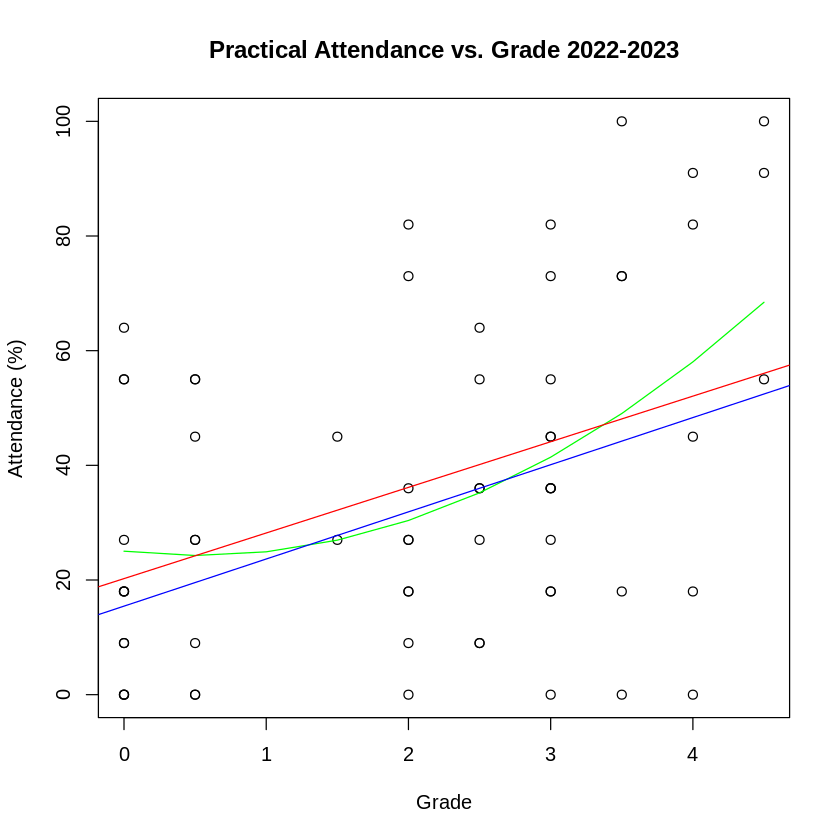

In [36]:
fit <- lm(data2023$PRACTICAL.PERCENT ~ data2023$GRADE)
theil_fit <- theil_sen_regression(PRACTICAL.PERCENT ~ GRADE, data2023)
quad_model <- lm(PRACTICAL.PERCENT ~ GRADE + GRADE2, data = data2023)
predictions <- predict(quad_model, list(GRADE = gradeValues, GRADE2 = gradeValues^2))
plot(data2023$GRADE, data2023$PRACTICAL.PERCENT, main="Practical Attendance vs. Grade 2022-2023", ylim=c(0,100), ylab="Attendance (%)", xlab= "Grade")
lines(gradeValues, predictions, col="green")
abline(fit, col="red")
abline(theil_fit, col="blue")

In [37]:
cor(data2023$GRADE,data2023$PRACTICAL.PERCENT)
cov(data2023$GRADE,data2023$PRACTICAL.PERCENT)
summary(fit)
summary(theil_fit)
summary(quad_model)

[1] 0.4052426

[1] 16.69176


Call:
lm(formula = data2023$PRACTICAL.PERCENT ~ data2023$GRADE)

Residuals:
   Min     1Q Median     3Q    Max 
-52.08 -19.20  -4.14  24.38  51.90 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)      20.247      5.764   3.512 0.000842 ***
data2023$GRADE    7.957      2.298   3.462 0.000985 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 26.21 on 61 degrees of freedom
Multiple R-squared:  0.1642,	Adjusted R-squared:  0.1505 
F-statistic: 11.99 on 1 and 61 DF,  p-value: 0.0009853



Call:
theil_sen_regression(formula = PRACTICAL.PERCENT ~ GRADE, data = data2023)

Residuals:
   Min     1Q Median     3Q    Max 
-48.33 -14.67   0.00  28.39  55.78 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   15.444      5.843   2.643 0.010421 *  
GRADE          8.222      2.330   3.529 0.000799 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 26.57 on 61 degrees of freedom
Multiple R-squared:  0.1696,	Adjusted R-squared:  0.1559 
F-statistic: 12.46 on 1 and 61 DF,  p-value: 0.0007993



Call:
lm(formula = PRACTICAL.PERCENT ~ GRADE + GRADE2, data = data2023)

Residuals:
   Min     1Q Median     3Q    Max 
-58.04 -18.70  -3.38  23.26  51.62 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   25.024      6.526   3.835 0.000304 ***
GRADE         -2.899      7.551  -0.384 0.702409    
GRADE2         2.788      1.849   1.508 0.136855    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 25.94 on 60 degrees of freedom
Multiple R-squared:  0.1947,	Adjusted R-squared:  0.1679 
F-statistic: 7.255 on 2 and 60 DF,  p-value: 0.001507


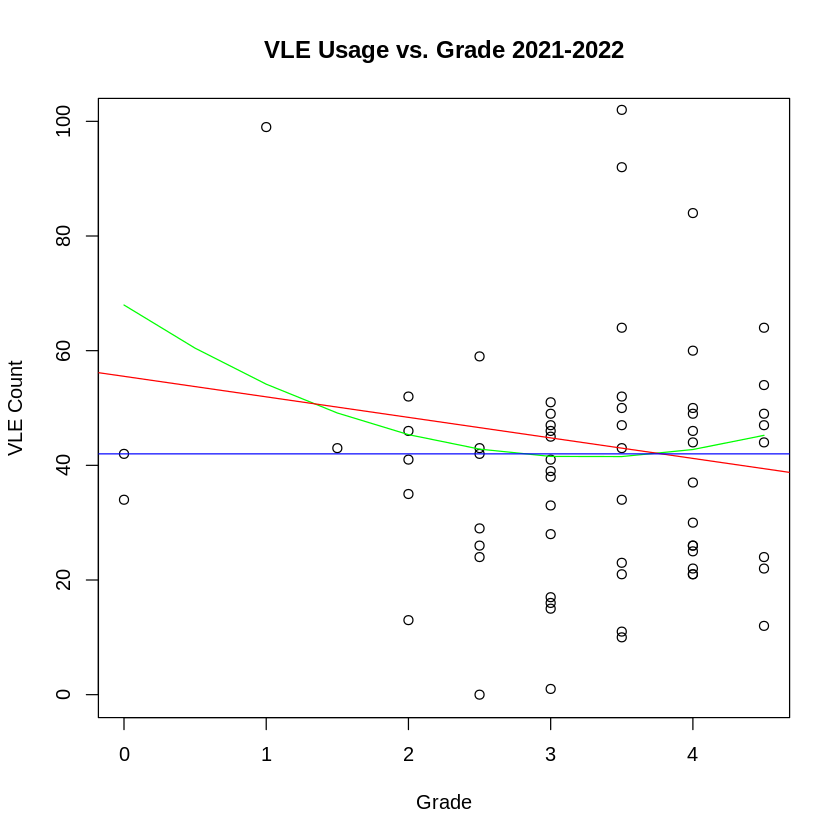

In [38]:
# Two cases when incorrect data is entered (outliers) these are removed for P-value calculation
testdata2022 <- data2022[complete.cases(data2022),]

fit <- lm(testdata2022$ACTIVITY.COUNT ~ testdata2022$GRADE)
theil_fit <- theil_sen_regression(ACTIVITY.COUNT ~ GRADE, testdata2022)
quad_model <- lm(ACTIVITY.COUNT ~ GRADE + GRADE2, data = testdata2022)
predictions <- predict(quad_model, list(GRADE = gradeValues, GRADE2 = gradeValues^2))
plot(testdata2022$GRADE, testdata2022$ACTIVITY.COUNT, main="VLE Usage vs. Grade 2021-2022", ylim=c(0,100), ylab="VLE Count", xlab= "Grade")
lines(gradeValues, predictions, col="green")
abline(fit, col="red")
abline(theil_fit, col="blue")

In [39]:
cor(data2022$GRADE,data2022$ACTIVITY.COUNT, use="complete.obs")
cov(data2022$GRADE,data2022$ACTIVITY.COUNT, use="complete.obs")
summary(fit)
summary(theil_fit)
summary(quad_model)

[1] -0.1343998

[1] -4.322997


Call:
lm(formula = testdata2022$ACTIVITY.COUNT ~ testdata2022$GRADE)

Residuals:
    Min      1Q  Median      3Q     Max 
-46.571 -17.979  -4.387   7.640  96.797 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)          55.519     11.121   4.992 4.62e-06 ***
testdata2022$GRADE   -3.579      3.330  -1.075    0.286    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 28.9 on 66 degrees of freedom
Multiple R-squared:  0.0172,	Adjusted R-squared:  0.002309 
F-statistic: 1.155 on 1 and 66 DF,  p-value: 0.2864



Call:
theil_sen_regression(formula = ACTIVITY.COUNT ~ GRADE, data = testdata2022)

Residuals:
   Min     1Q Median     3Q    Max 
-42.00 -17.25   0.00   8.00  96.00 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   42.000     11.250   3.733 0.000396 ***
GRADE          0.000      3.369   0.000 1.000000    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 29.24 on 66 degrees of freedom
Multiple R-squared:      0,	Adjusted R-squared:  -0.01515 
F-statistic:     0 on 1 and 66 DF,  p-value: 1



Call:
lm(formula = ACTIVITY.COUNT ~ GRADE + GRADE2, data = testdata2022)

Residuals:
    Min      1Q  Median      3Q     Max 
-42.828 -19.254  -1.895   7.293  95.242 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   67.960     15.479   4.391 4.25e-05 ***
GRADE        -16.307     11.532  -1.414    0.162    
GRADE2         2.502      2.171   1.152    0.253    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 28.83 on 65 degrees of freedom
Multiple R-squared:  0.03688,	Adjusted R-squared:  0.007246 
F-statistic: 1.245 on 2 and 65 DF,  p-value: 0.2949


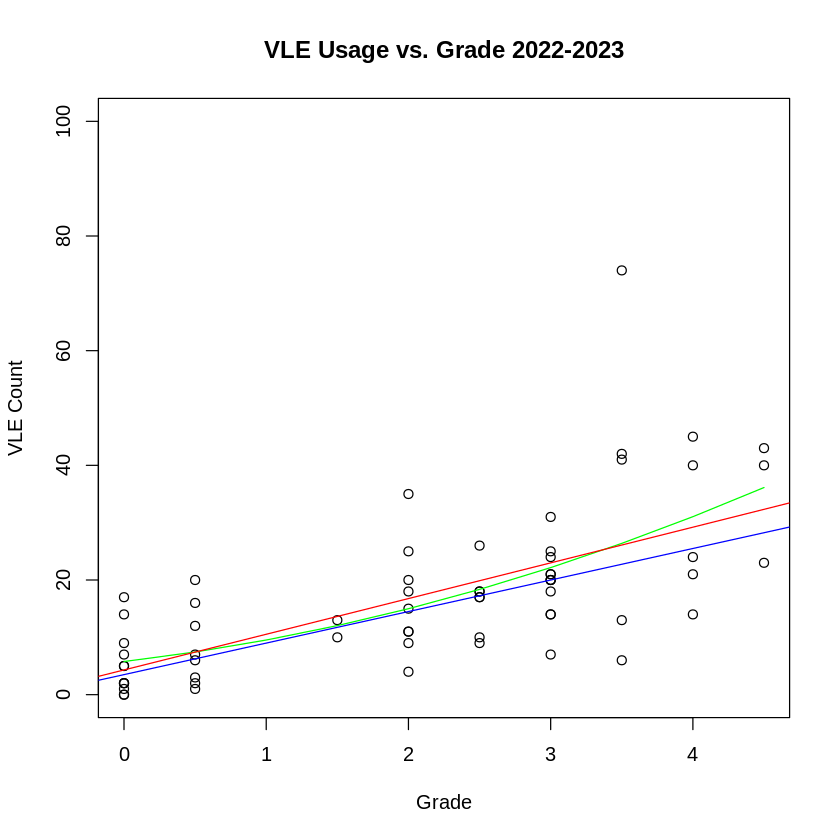

In [40]:
fit <- lm(data2023$ACTIVITY.COUNT ~ data2023$GRADE)
theil_fit <- theil_sen_regression(ACTIVITY.COUNT ~ GRADE, data2023)
quad_model <- lm(ACTIVITY.COUNT ~ GRADE + GRADE2, data = data2023)
predictions <- predict(quad_model, list(GRADE = gradeValues, GRADE2 = gradeValues^2))
plot(data2023$GRADE, data2023$ACTIVITY.COUNT, main="VLE Usage vs. Grade 2022-2023", ylim=c(0,100), ylab="VLE Count", xlab= "Grade")
lines(gradeValues, predictions, col="green")
abline(fit, col="red")
abline(theil_fit, col="blue")

In [41]:
cor(data2023$GRADE,data2023$ACTIVITY.COUNT)
cov(data2023$GRADE,data2023$ACTIVITY.COUNT)
summary(fit)
summary(theil_fit)
summary(quad_model)

[1] 0.6599387

[1] 13.05824


Call:
lm(formula = data2023$ACTIVITY.COUNT ~ data2023$GRADE)

Residuals:
    Min      1Q  Median      3Q     Max 
-20.103  -5.322  -1.990   4.629  47.897 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)      4.3150     2.2757   1.896   0.0627 .  
data2023$GRADE   6.2251     0.9074   6.860 4.02e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.35 on 61 degrees of freedom
Multiple R-squared:  0.4355,	Adjusted R-squared:  0.4263 
F-statistic: 47.06 on 1 and 61 DF,  p-value: 4.025e-09



Call:
theil_sen_regression(formula = ACTIVITY.COUNT ~ GRADE, data = data2023)

Residuals:
    Min      1Q  Median      3Q     Max 
-16.750  -3.500   0.000   5.625  51.250 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    3.500      2.345   1.493    0.141    
GRADE          5.500      0.935   5.882 1.84e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.66 on 61 degrees of freedom
Multiple R-squared:  0.3619,	Adjusted R-squared:  0.3515 
F-statistic:  34.6 on 1 and 61 DF,  p-value: 1.841e-07



Call:
lm(formula = ACTIVITY.COUNT ~ GRADE + GRADE2, data = data2023)

Residuals:
    Min      1Q  Median      3Q     Max 
-20.391  -5.611  -1.364   4.215  47.609 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)   5.7805     2.5957   2.227   0.0297 *
GRADE         2.8952     3.0033   0.964   0.3389  
GRADE2        0.8553     0.7355   1.163   0.2495  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.32 on 60 degrees of freedom
Multiple R-squared:  0.448,	Adjusted R-squared:  0.4296 
F-statistic: 24.34 on 2 and 60 DF,  p-value: 1.816e-08


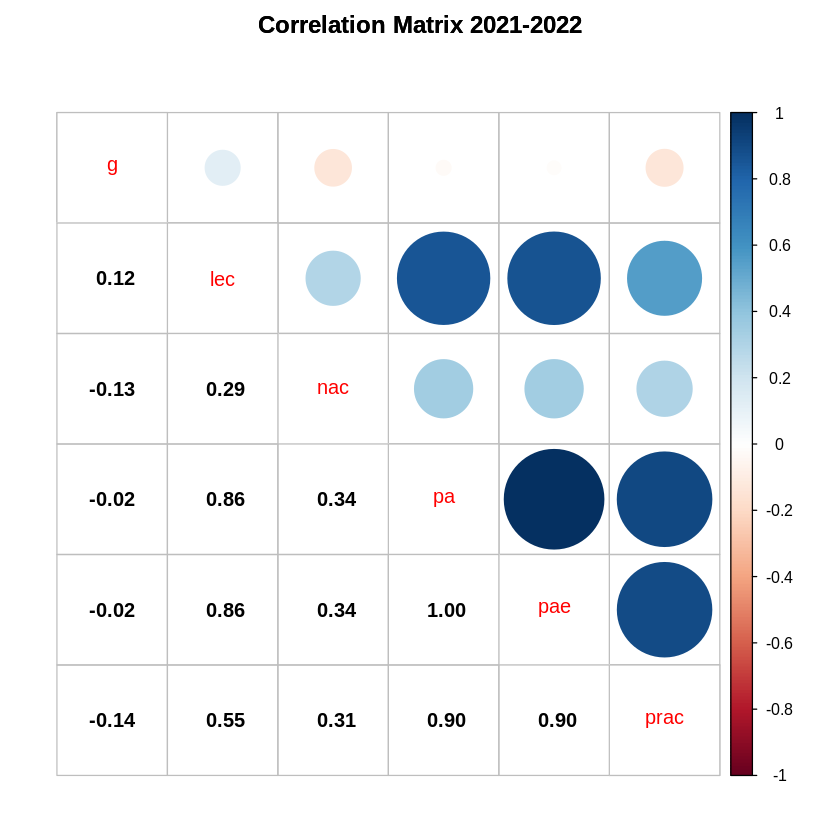

In [42]:
res <- cor(data2022_amended, use="complete.obs")
corrplot.mixed(res,main="Correlation Matrix 2021-2022", order = "alphabet", mar=c(0,0,2,0), tl.srt = 45, lower.col="black")

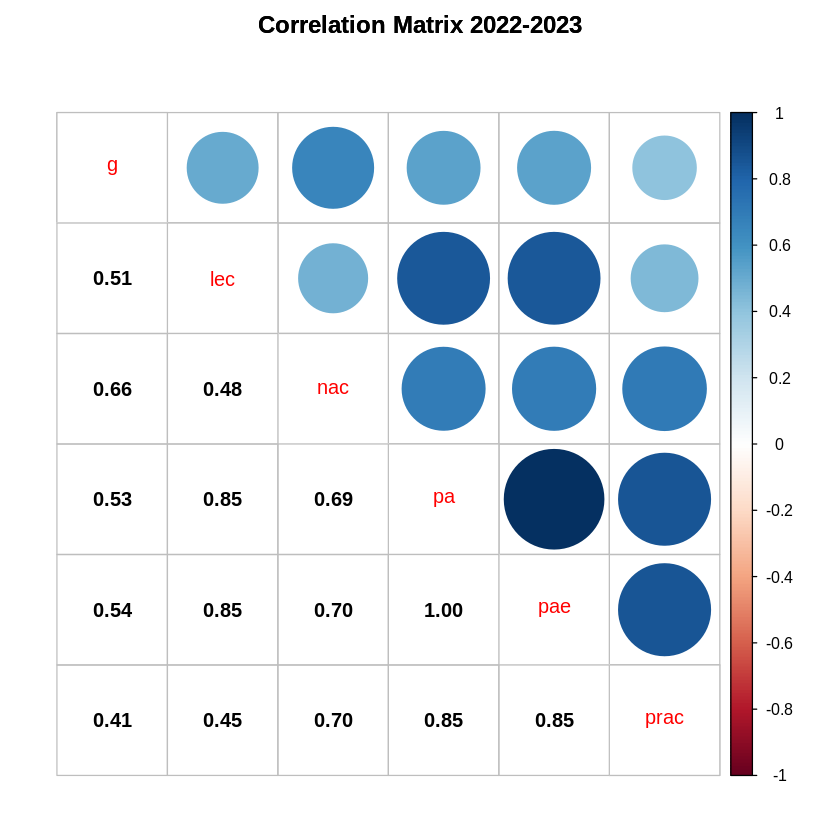

In [43]:
res <- cor(data2023_amended, use="complete.obs")
corrplot.mixed(res, order = "alphabet", tl.srt = 45,main="Correlation Matrix 2022-2023", mar=c(0,0,2,0), lower.col="black")

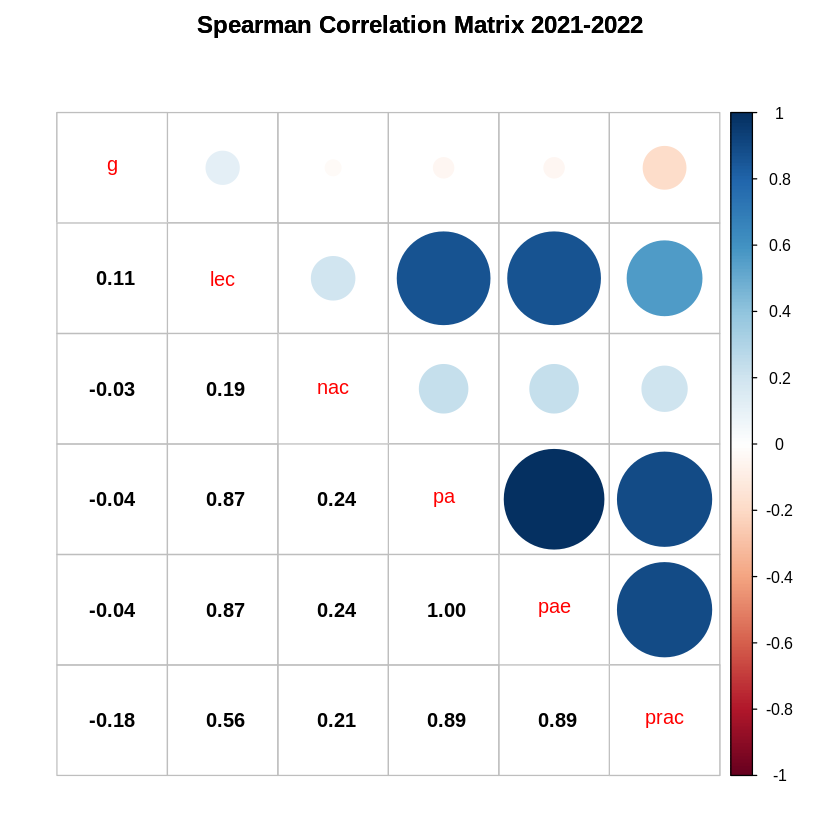

In [44]:
res <- cor(data2022_amended,method = "spearman", use="complete.obs")
corrplot.mixed(res,main="Spearman Correlation Matrix 2021-2022", order = "alphabet", mar=c(0,0,2,0), tl.srt = 45, lower.col="black")

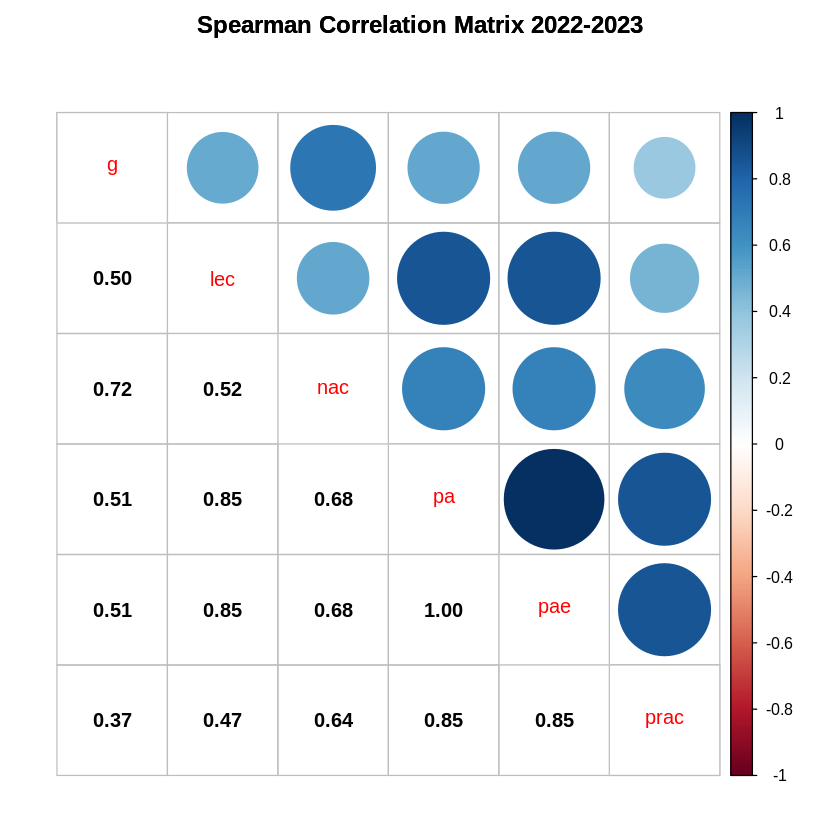

In [45]:
res <- cor(data2023_amended,method = "spearman", use="complete.obs")
corrplot.mixed(res,main="Spearman Correlation Matrix 2022-2023", order = "alphabet", mar=c(0,0,2,0), tl.srt = 45, lower.col="black")

In [46]:
Correlation <- c( cor(data2022$GRADE,data2022$ATTENDANCE.PERCENT,method = "spearman"),
                cor(data2023$GRADE,data2023$ATTENDANCE.PERCENT,method = "spearman"),
                cor(data2022$GRADE,data2022$ATTENDANCE.EXPECTED.PERCENT,method = "spearman"),
                cor(data2023$GRADE,data2023$ATTENDANCE.EXPECTED.PERCENT,method = "spearman"),
                cor(data2022$GRADE,data2022$LECTURE.PERCENT,method = "spearman"),
                cor(data2023$GRADE,data2023$LECTURE.PERCENT,method = "spearman"),
                cor(data2022$GRADE,data2022$PRACTICAL.PERCENT,method = "spearman"),
                cor(data2023$GRADE,data2023$PRACTICAL.PERCENT,method = "spearman"),
                cor(data2022$GRADE,data2022$ACTIVITY.COUNT,method = "spearman", use="complete.obs"),
                cor(data2023$GRADE,data2023$ACTIVITY.COUNT,method = "spearman"))

CoVariance <- c( cov(data2022$GRADE,data2022$ATTENDANCE.PERCENT,method = "spearman"),
                cov(data2023$GRADE,data2023$ATTENDANCE.PERCENT,method = "spearman"),
                cov(data2022$GRADE,data2022$ATTENDANCE.EXPECTED.PERCENT,method = "spearman"),
                cov(data2023$GRADE,data2023$ATTENDANCE.EXPECTED.PERCENT,method = "spearman"),
                cov(data2022$GRADE,data2022$LECTURE.PERCENT,method = "spearman"),
                cov(data2023$GRADE,data2023$LECTURE.PERCENT,method = "spearman"),
                cov(data2022$GRADE,data2022$PRACTICAL.PERCENT,method = "spearman"),
                cov(data2023$GRADE,data2023$PRACTICAL.PERCENT,method = "spearman"),
                cov(data2022$GRADE,data2022$ACTIVITY.COUNT,method = "spearman", use="complete.obs"),
                cov(data2023$GRADE,data2023$ACTIVITY.COUNT,method = "spearman"))

data_frame <- data.frame(Correlation, CoVariance)
rownames(data_frame) <- c( "2021-2022 Attendance (%)",
                          "2022-2023 Attendance (%)",
                          "2021-2022 E. Attendance (%)",
                          "2022-2023 E. Attendance (%)",
                          "2021-2022 L. Attendance (%)",
                          "2022-2023 L. Attendance (%)",
                          "2021-2022 P. Attendance (%)",
                          "2022-2023 P. Attendance (%)",
                          "2021-2022 VLE Use",
                          "2022-2023 VLE Use")
print(data_frame)

                            Correlation CoVariance
2021-2022 Attendance (%)    -0.01619333  -6.789286
2022-2023 Attendance (%)     0.51082244 169.495968
2021-2022 E. Attendance (%) -0.01619333  -6.789286
2022-2023 E. Attendance (%)  0.51082244 169.495968
2021-2022 L. Attendance (%)  0.11332060  46.996429
2022-2023 L. Attendance (%)  0.50205577 166.056452
2021-2022 P. Attendance (%) -0.13718592 -57.339286
2022-2023 P. Attendance (%)  0.37125256 122.697581
2021-2022 VLE Use           -0.02549384 -10.110294
2022-2023 VLE Use            0.72373680 240.383065


In [47]:
Correlation <- c( cor(data2022$GRADE,data2022$ATTENDANCE.PERCENT),
                cor(data2023$GRADE,data2023$ATTENDANCE.PERCENT),
                cor(data2022$GRADE,data2022$ATTENDANCE.EXPECTED.PERCENT),
                cor(data2023$GRADE,data2023$ATTENDANCE.EXPECTED.PERCENT),
                cor(data2022$GRADE,data2022$LECTURE.PERCENT),
                cor(data2023$GRADE,data2023$LECTURE.PERCENT),
                cor(data2022$GRADE,data2022$PRACTICAL.PERCENT),
                cor(data2023$GRADE,data2023$PRACTICAL.PERCENT),
                cor(data2022$GRADE,data2022$ACTIVITY.COUNT, use="complete.obs"),
                cor(data2023$GRADE,data2023$ACTIVITY.COUNT))

CoVariance <- c( cov(data2022$GRADE,data2022$ATTENDANCE.PERCENT),
                cov(data2023$GRADE,data2023$ATTENDANCE.PERCENT),
                cov(data2022$GRADE,data2022$ATTENDANCE.EXPECTED.PERCENT),
                cov(data2023$GRADE,data2023$ATTENDANCE.EXPECTED.PERCENT),
                cov(data2022$GRADE,data2022$LECTURE.PERCENT),
                cov(data2023$GRADE,data2023$LECTURE.PERCENT),
                cov(data2022$GRADE,data2022$PRACTICAL.PERCENT),
                cov(data2023$GRADE,data2023$PRACTICAL.PERCENT),
                cov(data2022$GRADE,data2022$ACTIVITY.COUNT, use="complete.obs"),
                cov(data2023$GRADE,data2023$ACTIVITY.COUNT))

data_frame <- data.frame(Correlation, CoVariance)
rownames(data_frame) <- c( "2021-2022 Attendance (%)",
                          "2022-2023 Attendance (%)",
                          "2021-2022 E. Attendance (%)",
                          "2022-2023 E. Attendance (%)",
                          "2021-2022 L. Attendance (%)",
                          "2022-2023 L. Attendance (%)",
                          "2021-2022 P. Attendance (%)",
                          "2022-2023 P. Attendance (%)",
                          "2021-2022 VLE Use",
                          "2022-2023 VLE Use")
print(data_frame)

                            Correlation CoVariance
2021-2022 Attendance (%)     0.01815565  0.4199195
2022-2023 Attendance (%)     0.53390077 12.7222222
2021-2022 E. Attendance (%)  0.02170085  0.7843058
2022-2023 E. Attendance (%)  0.53557470 19.3673835
2021-2022 L. Attendance (%)  0.12322239  5.4275654
2022-2023 L. Attendance (%)  0.50540156 22.3835125
2021-2022 P. Attendance (%) -0.06987933 -2.7171026
2022-2023 P. Attendance (%)  0.40524261 16.6917563
2021-2022 VLE Use           -0.13439982 -4.3229966
2022-2023 VLE Use            0.65993874 13.0582437


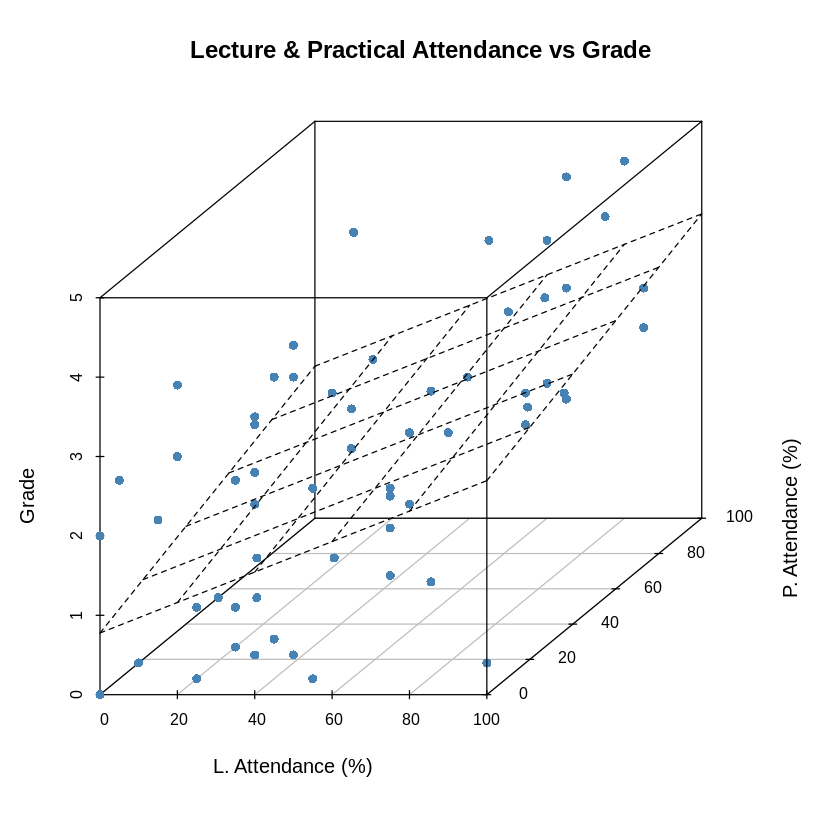

In [48]:
sds <- scatterplot3d(x=data2023$LECTURE.PERCENT, y=data2023$PRACTICAL.PERCENT, z=data2023$GRADE, pch = 16, color="steelblue", xlab="L. Attendance (%)", ylab="P. Attendance (%)", zlab="Grade",main="Lecture & Practical Attendance vs Grade")
lm_plane <- lm(data2023$GRADE ~ data2023$LECTURE.PERCENT + data2023$PRACTICAL.PERCENT)
sds$plane3d(lm_plane)

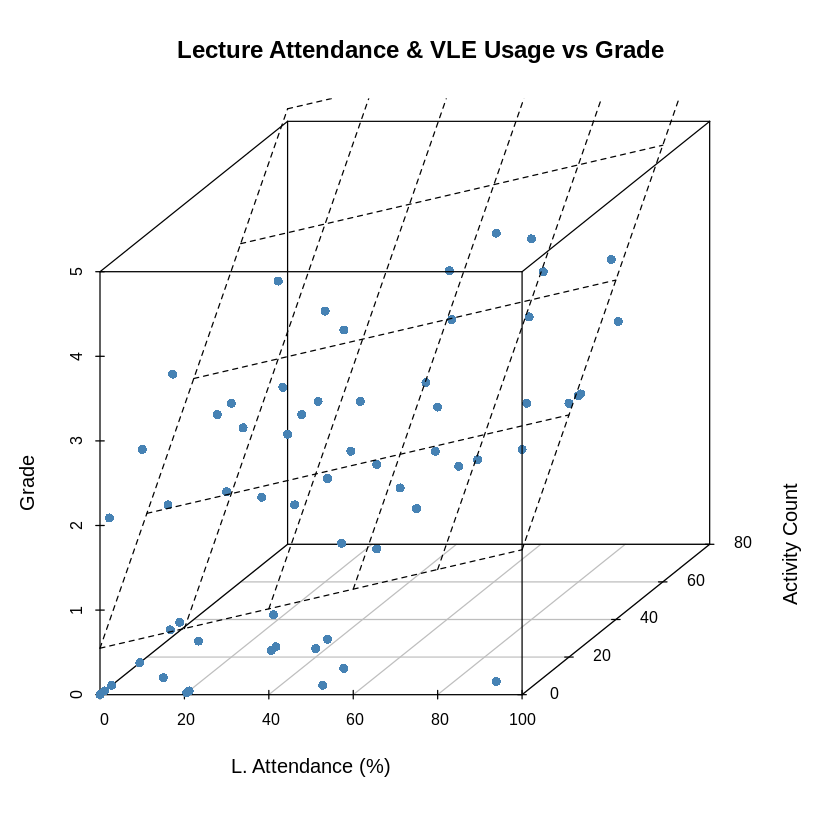

In [49]:
sds <- scatterplot3d(x=data2023$LECTURE.PERCENT, y=data2023$ACTIVITY.COUNT, z=data2023$GRADE, pch = 16, color="steelblue", xlab="L. Attendance (%)", ylab="Activity Count", zlab="Grade",main="Lecture Attendance & VLE Usage vs Grade")
lm_plane <- lm(data2023$GRADE ~ data2023$LECTURE.PERCENT + data2023$ACTIVITY.COUNT)
sds$plane3d(lm_plane)

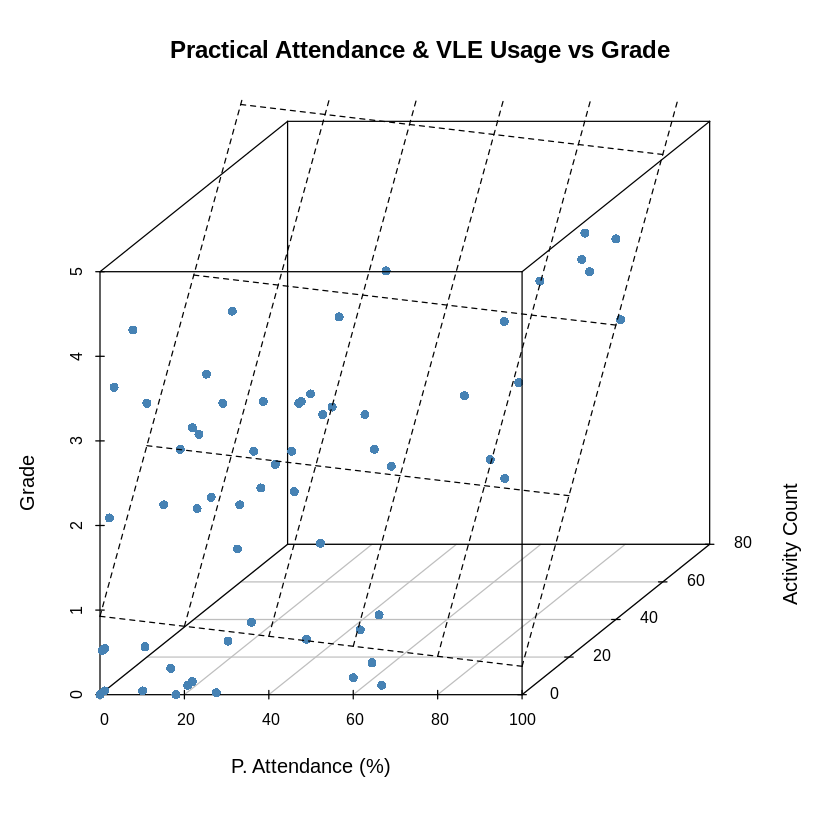

In [50]:
sds <- scatterplot3d(x=data2023$PRACTICAL.PERCENT, y=data2023$ACTIVITY.COUNT, z=data2023$GRADE, pch = 16, color="steelblue", xlab="P. Attendance (%)", ylab="Activity Count", zlab="Grade",main="Practical Attendance & VLE Usage vs Grade")
lm_plane <- lm(data2023$GRADE ~ data2023$PRACTICAL.PERCENT + data2023$ACTIVITY.COUNT)
sds$plane3d(lm_plane)

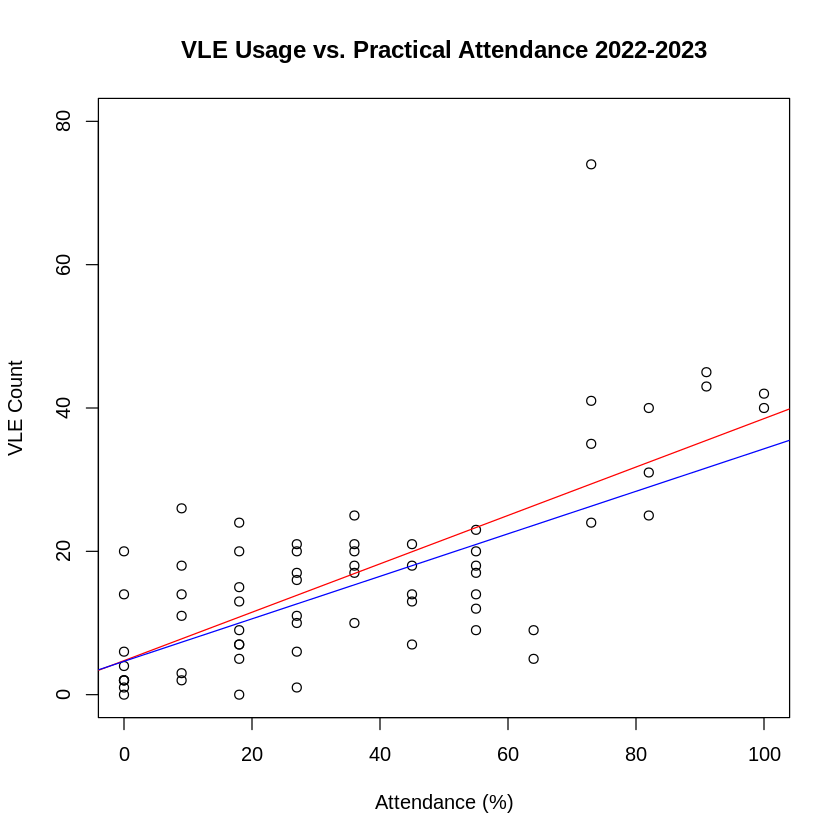

In [51]:
fit <- lm(data2023$ACTIVITY.COUNT ~ data2023$PRACTICAL.PERCENT)
theil_fit <- theil_sen_regression(ACTIVITY.COUNT ~ PRACTICAL.PERCENT, data2023)
plot(data2023$PRACTICAL.PERCENT, data2023$ACTIVITY.COUNT, main="VLE Usage vs. Practical Attendance 2022-2023", ylim=c(0,80), ylab="VLE Count", xlab= "Attendance (%)")
abline(fit, col="red")
abline(theil_fit, col="blue")

In [52]:
cor(data2023$PRACTICAL.PERCENT,data2023$ACTIVITY.COUNT)
cor(data2023$PRACTICAL.PERCENT,data2023$ACTIVITY.COUNT,method="spearman")
summary(fit)
summary(theil_fit)

[1] 0.7030442

[1] 0.6376687


Call:
lm(formula = data2023$ACTIVITY.COUNT ~ data2023$PRACTICAL.PERCENT)

Residuals:
    Min      1Q  Median      3Q     Max 
-21.364  -5.596  -1.443   4.884  44.596 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 4.74892    2.02145   2.349   0.0221 *  
data2023$PRACTICAL.PERCENT  0.33774    0.04374   7.721 1.33e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.795 on 61 degrees of freedom
Multiple R-squared:  0.4943,	Adjusted R-squared:  0.486 
F-statistic: 59.62 on 1 and 61 DF,  p-value: 1.328e-10



Call:
theil_sen_regression(formula = ACTIVITY.COUNT ~ PRACTICAL.PERCENT, 
    data = data2023)

Residuals:
    Min      1Q  Median      3Q     Max 
-18.635  -3.987   0.000   7.008  47.696 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)        4.65365    2.06358   2.255   0.0277 *  
PRACTICAL.PERCENT  0.29659    0.04465   6.642 9.52e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.999 on 61 degrees of freedom
Multiple R-squared:  0.4197,	Adjusted R-squared:  0.4102 
F-statistic: 44.12 on 1 and 61 DF,  p-value: 9.517e-09
